<a href="https://colab.research.google.com/github/domanmat/OLS_airbnb/blob/main/3_airbnb_berlin_apts_no_hosts_xgB_load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Edycja biblioteki SweetViz
Jeśli chcesz skorzystać z SweetViz - poniżej kod do skutecznego zakomentowania linii w graph_numeric.py:
* za 1-szym razem uruchom tylko komórkę poniżej (bez komentarzy, ctrl+A & ctrl+/)
* zrób to tylko za 1-szym uruchomieniem i tylko tej komórki
* Runtime --> Restart session
* zakomentuj komórkę nr 2 (całą, tral+A & ctrl+/) i puść resztę



In [ ]:
# # Completely remove and reinstall SweetViz
# !pip uninstall sweetviz -y -qq
# !rm -rf /usr/local/lib/python3.12/dist-packages/sweetviz
# !pip install sweetviz -qq

# # Now apply the fix with a more robust approach
# file_path = '/usr/local/lib/python3.12/dist-packages/sweetviz/graph_numeric.py'

# with open(file_path, 'r') as f:
#     content = f.read()

# # Use string replacement to be precise
# old_section = """        gap_percent = config["Graphs"].getfloat("summary_graph_categorical_gap")

#         warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
#         self.hist_specs = axs.hist(plot_data, weights = normalizing_weights, bins=self.num_bins, \\
#                                    rwidth = (100.0 - gap_percent) / 100.0)
#         warnings.filterwarnings('once', category=np.VisibleDeprecationWarning)

#         bin_limits = self.hist_specs[1]"""

# new_section = """        gap_percent = config["Graphs"].getfloat("summary_graph_categorical_gap")

#         # warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
#         self.hist_specs = axs.hist(plot_data, weights = normalizing_weights, bins=self.num_bins, \\
#                                    rwidth = (100.0 - gap_percent) / 100.0)
#         # warnings.filterwarnings('once', category=np.VisibleDeprecationWarning)

#         bin_limits = self.hist_specs[1]"""

# content = content.replace(old_section, new_section)

# with open(file_path, 'w') as f:
#     f.write(content)

# print("✓ File fixed")

# # Verify
# print("\n=== Lines 69-76 ===")
# !sed -n '69,76p' /usr/local/lib/python3.12/dist-packages/sweetviz/graph_numeric.py

# # Clear cache
# !rm -rf /usr/local/lib/python3.12/dist-packages/sweetviz/__pycache__
# !find /usr/local/lib/python3.12/dist-packages/sweetviz -name "*.pyc" -delete

# print("\n✓ IMPORTANT: Restart runtime now (Runtime → Restart runtime)")

#Stowarzyszenie „Mieszkalnik” rozważa agresywną kampanię inwestycyjną w jednym z europejskich miast, ale potrzebuje Twojej wskazówki, od czego zacząć!

Kontekst: „Mieszkalnik”, stowarzyszenie właścicieli nieruchomości, rozważa agresywną kampanię inwestycyjną w jednym z europejskich miast.

Stowarzyszenie chce wybrać miasto, kierując się dobrą znajomością czynników wpływających na ceny najmu i umiejętnością prognozowania wyników najmu pozyskanych inwestycji.

Cel:
* opracowanie raportu na temat kształtowania się cen najmu Airbnb w wybranych miastach (wykorzystanie technik uczenia maszynowego)
* **rekomendacja miast**, w których Mieszkalnik może rozpocząć inwestycję jako pierwszy (założenie poziomu cen nieruchomości, rozważenie, jakie aspekty podniesienia cen najmu są najlepsze)
* przygotowanie się do przewidywania wyników najmu danej nieruchomości przez Dyrektora ds. Inwestycji Mieszkalnik.

**Odbiorcy:** Rada dyrektorów Mieszkalnik

Źródło danych: http://insideairbnb.com/get-the-data.html



**Zadania programisty:**
* Przygotuj dane (dla 2 miast)
* Załaduj dane do preferowanego narzędzia
* Wykorzystaj model regresji liniowej
* Wykorzystaj modele XGBoost + XAI
* Przekaż wyniki w sposób czytelny reszcie zespołu



Otrzymuje 3780 dolarów za czynsz w wysokości 3800 dolarów – grozi eksmisją
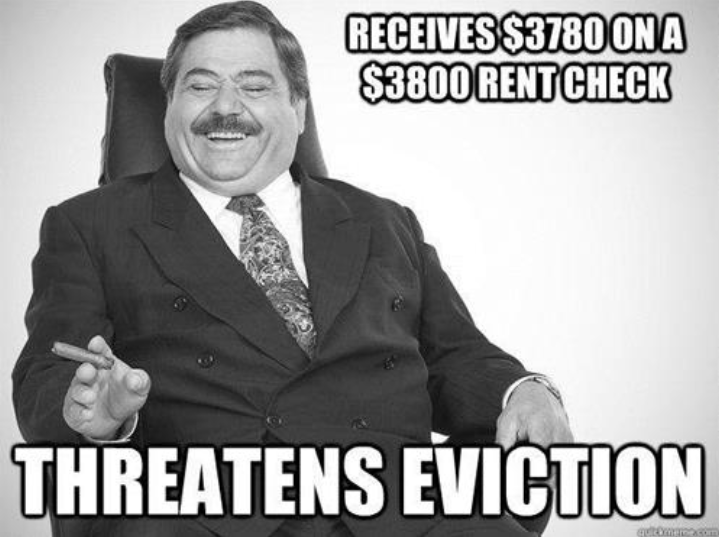


# What shapes Berlin AirBnB prices ?


## Import and load packages

In [ ]:
# Inne instalacje które warto wykonać tylko 1 raz - na początku:
!pip install shap -qq
!sudo apt-get install p7zip-full p7zip-rar -qq
!pip install gdown -qq

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import lasso_path
import xgboost
import shap

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package p7zip-rar.
(Reading database ... 117528 files and directories currently installed.)
Preparing to unpack .../p7zip-rar_16.02-3build1_amd64.deb ...
Unpacking p7zip-rar (16.02-3build1) ...
Setting up p7zip-rar (16.02-3build1) ...


In [ ]:
sns.set_style("whitegrid")

## Airbnb and Airbnb Open Data

**Airbnb** is a company that provides a platform for people to list, discover, and book accommodations around the world. As part of its commitment to transparency and open data, Airbnb has made some of its data available for public use.

The **Airbnb Open Data** initiative provides access to a variety of datasets related to Airbnb's business and the broader hospitality industry. These datasets are made available under an open data license, which allows anyone to access, use, and share the data for any purpose.

The Airbnb Open Data initiative includes a range of datasets, including:

* **Listings data**: This dataset includes information about properties listed on Airbnb, including the location, price, availability, and amenities of each property.

* **Reviews data**: This dataset includes reviews and ratings left by guests who have stayed at Airbnb properties.

* **Calendar data**: This dataset includes availability information for Airbnb properties, including dates when a property is booked or available for booking.

* **Demographic data**: This dataset includes information about the demographics of Airbnb users, including age, gender, and location.

* **Host data**: This dataset includes information about Airbnb hosts, including the properties they own or manage and the number of reviews they have received.

The Airbnb Open Data initiative is intended to help researchers, policymakers, and others better understand the hospitality industry and the impact of Airbnb on communities around the world. It is also intended to encourage the development of new tools, applications, and research that can help Airbnb and other companies improve their services and better meet the needs of their users.

Data is available here http://insideairbnb.com/get-the-data

In this notebook we will focus on **Listings data**  

**Listings data** is a dataset that includes information about properties listed on Airbnb. This dataset includes details about the
* location,
* price,
* availability, and
* amenities of each property.

Here are some examples of the types of information that might be included in the listings data:

* **Property type**: Is the property a private room, shared room, or entire home/apartment?

* **Location**: Where is the property located (e.g., city, state, country)?

* **Price**: How much does it cost to stay at the property?

* **Availability**: When is the property available for booking?

* **Amenities**: What amenities are available at the property (e.g., WiFi, laundry facilities, kitchen)?

* **Photos**: What does the property look like (e.g., interior, exterior)?

Listings data can be useful for understanding the types of properties that are available on Airbnb, as well as the prices and amenities offered. It can also be used to analyze trends in the hospitality industry and understand the demand for different types of accommodations. For example, researchers might use listings data to study the impact of Airbnb on the housing market in a particular city, or to **understand the factors that influence the popularity of different types of properties**.

## Get data

###Download

In [ ]:
# download data for Prague
import gdown
url = 'https://data.insideairbnb.com/germany/be/berlin/2025-09-23/data/listings.csv.gz'

output = "listings_Berlin.gz"
gdown.download(url, output)

Downloading...
From: https://data.insideairbnb.com/germany/be/berlin/2025-09-23/data/listings.csv.gz
To: /content/listings_Berlin.gz
100%|██████████| 7.26M/7.26M [00:00<00:00, 33.4MB/s]


'listings_Berlin.gz'

In [ ]:
!ls -lah

total 7.0M
drwxr-xr-x 1 root root 4.0K Jan 14 20:27 .
drwxr-xr-x 1 root root 4.0K Jan 14 20:21 ..
drwxr-xr-x 4 root root 4.0K Dec 11 14:34 .config
drwx------ 5 root root 4.0K Jan 14 20:22 drive
-rw-r--r-- 1 root root 7.0M Jan 14 20:27 listings_Berlin.gz
drwxr-xr-x 1 root root 4.0K Dec 11 14:34 sample_data


### Extract files

In [ ]:
# # # Install libraries to unzip all
# !sudo apt-get install p7zip-full p7zip-rar -qq
# Unrar rar file
!7z x {output} -y


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 7263842 bytes (7094 KiB)

Extracting archive: listings_Berlin.gz
--
Path = listings_Berlin.gz
Type = gzip
Headers Size = 23

  0% - listings.csv                    69% - listings.csv                   Everything is Ok

Size:       30619779
Compressed: 7263842


In [ ]:
!ls -lah

total 37M
drwxr-xr-x 1 root root 4.0K Jan 14 20:27 .
drwxr-xr-x 1 root root 4.0K Jan 14 20:21 ..
drwxr-xr-x 4 root root 4.0K Dec 11 14:34 .config
drwx------ 5 root root 4.0K Jan 14 20:22 drive
-rw-r--r-- 1 root root 7.0M Jan 14 20:27 listings_Berlin.gz
-rw-r--r-- 1 root root  30M Oct  6 05:43 listings.csv
drwxr-xr-x 1 root root 4.0K Dec 11 14:34 sample_data


### Read data

In [ ]:
data_raw = pd.read_csv('listings.csv')

In [ ]:
# Print data info
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14274 entries, 0 to 14273
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            14274 non-null  int64  
 1   listing_url                                   14274 non-null  object 
 2   scrape_id                                     14274 non-null  int64  
 3   last_scraped                                  14274 non-null  object 
 4   source                                        14274 non-null  object 
 5   name                                          14274 non-null  object 
 6   description                                   13712 non-null  object 
 7   neighborhood_overview                         6474 non-null   object 
 8   picture_url                                   14274 non-null  object 
 9   host_id                                       14274 non-null 

### Raw Data

In [ ]:
# Pokaż wszystkie kolumny i 10 wierszy
pd.set_option('display.max_columns', None)     # Wszystkie kolumny
pd.set_option('display.width', 1000)           # Szerokość wyświetlania
pd.set_option('display.max_colwidth', 50)      # Max szerokość pojedynczej kolumny
pd.set_option('display.expand_frame_repr', False)  # Nie łam DataFrame na wiele linii
pd.set_option('display.max_rows', None)  # Wszystkie wiersze
data_raw.head(100).T

0                                                  1                                                  2                                                  3                                                  4                                                  5                                                  6                                                  7                                                  8                                                  9                                                  10                                                 11                                                 12                                                 13                                                 14                                                 15                                                 16                                                 17                                                 18                                                 19                                                 20                                                 21                                                 22                                                 23                                                 24                                                 25                                                 26                                                 27                                                 28                                                 29                                                 30                                                 31                                                 32                                                 33                                                 34                                                 35                                                 36                                                 37                                                 38                                                 39                                                 40                                                 41                                                 42                                                 43                                                 44                                                 45                                                 46                                                 47                                                 48                                                 49                                                 50                                                 51                                                 52                                                 53                                                 54                                                 55                                                 56                                                 57                                                 58                                                 59                                                 60                                                 61                                                 62                                                 63                                                 64                                                 65                                                 66                                                 67                                                 68                                                 69                                                 70                                                 71                                                 72                                                 73                                                 74                                                 75                                                 76                                                 77                                                 78                    

In [ ]:
data_raw.head(10)

id                         listing_url       scrape_id last_scraped           source                                           name                                        description                              neighborhood_overview                                        picture_url  host_id                                  host_url       host_name  host_since           host_location                                         host_about  host_response_time host_response_rate host_acceptance_rate host_is_superhost                                 host_thumbnail_url                                   host_picture_url host_neighbourhood  host_listings_count  host_total_listings_count                host_verifications host_has_profile_pic host_identity_verified    neighbourhood    neighbourhood_cleansed neighbourhood_group_cleansed  latitude  longitude       property_type        room_type  accommodates  bathrooms bathrooms_text  bedrooms  beds                                          amenities    price  minimum_nights  maximum_nights  minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  calendar_updated has_availability  availability_30  availability_60  availability_90  availability_365 calendar_last_scraped  number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  availability_eoy  number_of_reviews_ly  estimated_occupancy_l365d  estimated_revenue_l365d first_review last_review  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value                                            license instant_bookable  calculated_host_listings_count  calculated_host_listings_count_entire_homes  calculated_host_listings_count_private_rooms  calculated_host_listings_count_shared_rooms  reviews_per_month
0   3176   https://www.airbnb.com/rooms/3176  20250923202926   2025-09-24      city scrape                Fabulous Flat in great Location  This beautiful first floor apartment  is situa...  The neighbourhood is famous for its variety of...  https://a0.muscache.com/pictures/hosting/Hosti...     3718    https://www.airbnb.com/users/show/3718          Britta  2008-10-19     Coledale, Australia  We love to travel ourselves a lot and prefer t...        within a day               100%                  83%                 f  https://a0.muscache.com/im/users/3718/profile_...  https://a0.muscache.com/im/users/3718/profile_...    Prenzlauer Berg                  1.0                        1.0                ['email', 'phone']                    t                      t  Berlin, Germany   Prenzlauer Berg Südwest                       Pankow  52.53471   13.41810  Entire rental unit  Entire home/apt             2        1.0         1 bath       1.0   2.0  ["Cooking basics", "Wine glasses", "Crib", "Ho...  $105.00              63             730                    63.0                    63.0                   730.0                   730.0                    63.0                   730.0               NaN                t                0                0                0               140            2025-09-24                150                      2                       0                 0                     0                        252                  26460.0   2009-06-20  2025-08-09                  4.63                    4.67                       4.52                   4.65                         4.70                    4.92                 4.61  First name and Last name: Nicolas Krotz <br/> ...                f                               1                                            1                                             0                                            0               0.76
1   9991   https://www.airbnb.com/rooms/9991  20250923202926   2025-09-24      city scrape            Geourgeous flat - outstanding views  4 bedroom with 

In [ ]:
print(data_raw.shape)
data_raw.head()

(14274, 79)


id                         listing_url       scrape_id last_scraped       source                                           name                                        description                              neighborhood_overview                                        picture_url  host_id                                 host_url       host_name  host_since           host_location                                         host_about  host_response_time host_response_rate host_acceptance_rate host_is_superhost                                 host_thumbnail_url                                   host_picture_url host_neighbourhood  host_listings_count  host_total_listings_count                host_verifications host_has_profile_pic host_identity_verified    neighbourhood    neighbourhood_cleansed neighbourhood_group_cleansed  latitude  longitude       property_type        room_type  accommodates  bathrooms bathrooms_text  bedrooms  beds                                          amenities    price  minimum_nights  maximum_nights  minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  calendar_updated has_availability  availability_30  availability_60  availability_90  availability_365 calendar_last_scraped  number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  availability_eoy  number_of_reviews_ly  estimated_occupancy_l365d  estimated_revenue_l365d first_review last_review  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value                                            license instant_bookable  calculated_host_listings_count  calculated_host_listings_count_entire_homes  calculated_host_listings_count_private_rooms  calculated_host_listings_count_shared_rooms  reviews_per_month
0   3176   https://www.airbnb.com/rooms/3176  20250923202926   2025-09-24  city scrape                Fabulous Flat in great Location  This beautiful first floor apartment  is situa...  The neighbourhood is famous for its variety of...  https://a0.muscache.com/pictures/hosting/Hosti...     3718   https://www.airbnb.com/users/show/3718          Britta  2008-10-19     Coledale, Australia  We love to travel ourselves a lot and prefer t...        within a day               100%                  83%                 f  https://a0.muscache.com/im/users/3718/profile_...  https://a0.muscache.com/im/users/3718/profile_...    Prenzlauer Berg                  1.0                        1.0                ['email', 'phone']                    t                      t  Berlin, Germany   Prenzlauer Berg Südwest                       Pankow  52.53471   13.41810  Entire rental unit  Entire home/apt             2        1.0         1 bath       1.0   2.0  ["Cooking basics", "Wine glasses", "Crib", "Ho...  $105.00              63             730                    63.0                    63.0                   730.0                   730.0                    63.0                   730.0               NaN                t                0                0                0               140            2025-09-24                150                      2                       0                 0                     0                        252                  26460.0   2009-06-20  2025-08-09                  4.63                    4.67                       4.52                   4.65                         4.70                    4.92                 4.61  First name and Last name: Nicolas Krotz <br/> ...                f                               1                                            1                                             0                                            0               0.76
1   9991   https://www.airbnb.com/rooms/9991  20250923202926   2025-09-24  city scrape            Geourgeous flat - outstanding views  4 bedroom with very large win

### Filter data rows

In [ ]:
# Usuwa wiersze niebędące domami/apartamentami
data_raw = data_raw[data_raw['room_type'] == 'Entire home/apt']

### Filter data columns

In [ ]:
# Usuń wszystkie kolumny zawierające 'host' (case-insensitive)
columns_to_drop = [col for col in data_raw.columns if 'host' in col.lower()]
data_raw = data_raw.drop(columns=columns_to_drop)

print(f"Usunięto {len(columns_to_drop)} kolumn zawierających 'host'")
print(f"Usunięte kolumny: {columns_to_drop}")

Usunięto 22 kolumn zawierających 'host'
Usunięte kolumny: ['host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']


In [ ]:
# Usuń wszystkie kolumny zawierające 'review' (case-insensitive)
columns_to_drop = [col for col in data_raw.columns if 'review' in col.lower()]
data_raw = data_raw.drop(columns=columns_to_drop)

print(f"Usunięto {len(columns_to_drop)} kolumn zawierających 'review'")
print(f"Usunięte kolumny: {columns_to_drop}")

Usunięto 14 kolumn zawierających 'review'
Usunięte kolumny: ['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'number_of_reviews_ly', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']


# Analysis and Data preparation (EDA with SweetViz)

### Report

In [ ]:
# # Verify the changes
# !ls /usr/local/lib/python3.12/dist-packages/sweetviz/
# !sed -n '69,76p' /usr/local/lib/python3.12/dist-packages/sweetviz/graph_numeric.py

# # Run sweet wiz analysis
# import sweetviz as sv
# import warnings
# warnings.filterwarnings('ignore')

# my_report = sv.analyze(data_raw, pairwise_analysis="off")
# my_report.show_notebook()

In [ ]:
data_raw.head(10)

id                         listing_url       scrape_id last_scraped           source                                           name                                        description                              neighborhood_overview                                        picture_url    neighbourhood    neighbourhood_cleansed neighbourhood_group_cleansed  latitude  longitude       property_type        room_type  accommodates  bathrooms bathrooms_text  bedrooms  beds                                          amenities    price  minimum_nights  maximum_nights  minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  calendar_updated has_availability  availability_30  availability_60  availability_90  availability_365 calendar_last_scraped  availability_eoy  estimated_occupancy_l365d  estimated_revenue_l365d                                            license instant_bookable
0   3176   https://www.airbnb.com/rooms/3176  20250923202926   2025-09-24      city scrape                Fabulous Flat in great Location  This beautiful first floor apartment  is situa...  The neighbourhood is famous for its variety of...  https://a0.muscache.com/pictures/hosting/Hosti...  Berlin, Germany   Prenzlauer Berg Südwest                       Pankow  52.53471   13.41810  Entire rental unit  Entire home/apt             2        1.0         1 bath       1.0   2.0  ["Cooking basics", "Wine glasses", "Crib", "Ho...  $105.00              63             730                    63.0                    63.0                   730.0                   730.0                    63.0                   730.0               NaN                t                0                0                0               140            2025-09-24                 0                        252                  26460.0  First name and Last name: Nicolas Krotz <br/> ...                f
1   9991   https://www.airbnb.com/rooms/9991  20250923202926   2025-09-24      city scrape            Geourgeous flat - outstanding views  4 bedroom with very large windows and outstand...  Prenzlauer Berg is an amazing neighbourhood wh...  https://a0.muscache.com/pictures/42799131/59c8...  Berlin, Germany   Prenzlauer Berg Südwest                       Pankow  52.53269   13.41805  Entire rental unit  Entire home/apt             7        2.5      2.5 baths       4.0   4.0  ["Cooking basics", "Crib", "Stove", "Elevator"...  $135.00               6              14                     6.0                     6.0                    14.0                    14.0                     6.0                    14.0               NaN                t                0                1               14               241            2025-09-24                16                          0                      0.0                                  03/Z/RA/003410-18                f
2  14325  https://www.airbnb.com/rooms/14325  20250923202926   2025-09-24      city scrape            Studio Apartment in Prenzlauer Berg  The apartment is located on the upper second f...                                                NaN  https://a0.muscache.com/pictures/508703/24988a...              NaN  Prenzlauer Berg Nordwest                       Pankow  52.54813   13.40366  Entire rental unit  Entire home/apt             1        1.0         1 bath       0.0   1.0  ["Ethernet connection", "Dishes and silverware...   $75.00             150            1125                   150.0                   150.0                  1125.0                  1125.0                   150.0                  1125.0               NaN                t               17               17               17               168            2025-09-24                17                          0                      0.0                                                NaN                f
3  17904  https://www.airbnb.com/rooms/17904  20250923202926   2025-09-24      city scrape  Beauti

# Prepare the target varaible = price
(ma tylko 65% kompletności danych)

### Process data

In [ ]:
# Drop columns with NaNs greater than the threshold
# data = data_raw.dropna(axis=1, thresh= 0.8*data_raw.shape[0]).copy()
data_price = data_raw.dropna(subset=['price']).copy()
# data = data_price.dropna(axis=1, thresh=0.75*data_price.shape[0])
data = data_price.dropna(axis=1, thresh=0.8*data_price.shape[0])
print(len(data))

print(data.shape)
print(data.head(10))

6806
(6806, 39)
       id                         listing_url       scrape_id last_scraped       source                                               name                                        description                                        picture_url    neighbourhood_cleansed neighbourhood_group_cleansed  latitude  longitude       property_type        room_type  accommodates  bathrooms bathrooms_text  bedrooms  beds                                          amenities    price  minimum_nights  maximum_nights  minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm has_availability  availability_30  availability_60  availability_90  availability_365 calendar_last_scraped  availability_eoy  estimated_occupancy_l365d  estimated_revenue_l365d instant_bookable
0    3176   https://www.airbnb.com/rooms/3176  20250923202926   2025-09-24  city scrape                    Fabulous Flat in great Location  Thi

### Cloumn names list

In [ ]:
data.head(100).T

0                                                  1                                                  2                                                  3                                                  4                                                  6                                                  7                                                  8                                                  9                                                  10                                                 11                                                 17                                                 18                                                 19                                                 20                                                 21                                                 23                                                 24                                                 25                                                 26                                                 27                                                 28                                                 29                                                 30                                                 31                                                 32                                                 33                                                 34                                                 35                                                 36                                                 38                                                 39                                                 40                                                 43                                                 44                                                 50                                                 51                                                 52                                                 53                                                 55                                                 56                                                 58                                                 61                                                 66                                                 67                                                 68                                                 69                                                 71                                                 72                                                 74                                                 75                                                 77                                                 78                                                 79                                                 80                                                 81                                                 82                                                 83                                                 85                                                 86                                                 87                                                 88                                                 89                                                 90                                                 91                                                 92                                                 93                                                 94                                                 95                                                 96                                                 97                                                 99                                                 100                                                101                                                102                                                106                                                107                                                108                                                110                   

In [ ]:
print(f"Original data shape: {data_raw.shape}")
print(f"Data shape after dropping columns with 'price' NaNs: {data_price.shape}")
print(f"Data shape after dropping columns with NaNs: {data.shape}")

Original data shape: (9663, 43)
Data shape after dropping columns with 'price' NaNs: (6806, 43)
Data shape after dropping columns with NaNs: (6806, 39)


In [ ]:
data.price.head()
# Oups, our price is a string, it has to be cleaned!
# need to clean and convert it to float

0    $105.00
1    $135.00
2     $75.00
3     $32.00
4    $202.00
Name: price, dtype: object

### Cast the target (price) to float

Cast price column to float (replace "$", "," and cast to "float")

**Price - kwoty podane w EURO!**

In [ ]:
# Process
data.price.str.replace("$","").str.replace(",","").astype("float").describe()

# Cast price as float
data.price = data.price.apply(lambda x: x.replace("$", ""))
data.price = data.price.apply(lambda x: x.replace(",", ""))
data.price = data.price.astype("float")

# # Przekształć liniowo: price/100*4.11 - kurs 100 koron = 4,11 eur
# data.price = data.price / 100 * 4.11

data.price.describe()

/tmp/ipython-input-1595528674.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.price = data.price.apply(lambda x: x.replace("$", ""))
/tmp/ipython-input-1595528674.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.price = data.price.apply(lambda x: x.replace(",", ""))
/tmp/ipython-input-1595528674.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

count     6806.000000
mean       162.085072
std        380.227418
min         10.000000
25%         85.000000
50%        120.000000
75%        175.000000
max      10007.000000
Name: price, dtype: float64

### Outlier deletion

LIKWIDACJA OUTLIERÓW, po co?

Słabo modelują dane.

Odcięcie 99, 98, 95 percentyla - ok.
Podobnie odcięcie 1,2,5 percentyla.

In [ ]:
data.price.describe()

count     6806.000000
mean       162.085072
std        380.227418
min         10.000000
25%         85.000000
50%        120.000000
75%        175.000000
max      10007.000000
Name: price, dtype: float64

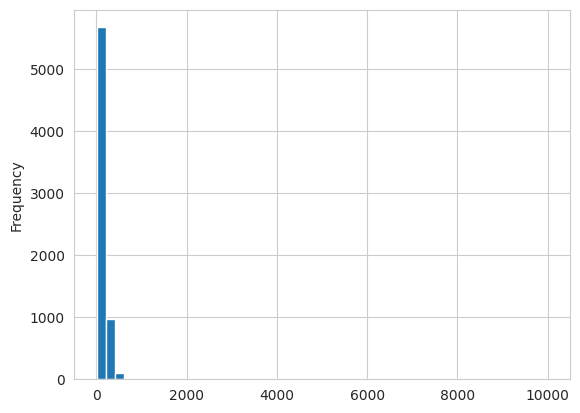

In [ ]:
# Mhm, we have outliers which seem to be to-be-deleted-errors
data.price.plot.hist(bins=50)
plt.show()

In [ ]:
# Getting rid of outliers
threshold_top=(np.percentile(data.price, 95))
threshold_bottom=(np.percentile(data.price, 5))
print("95% properties have a price lower than {0: .2f}".format(threshold_top))
print("95% properties have a price higher than {0: .2f}".format(threshold_bottom))
data_cut = data[(data.price <= threshold_top) & (data.price > threshold_bottom)]
all_data=data
data = data_cut
print(all_data.shape, data.shape)

95% properties have a price lower than  319.00
95% properties have a price higher than  53.00
(6806, 39) (6113, 39)


<Axes: ylabel='Frequency'>

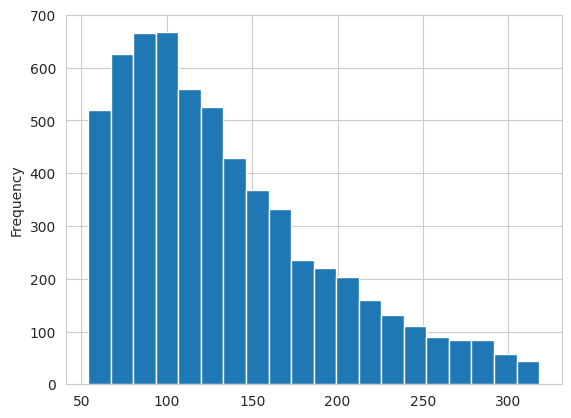

In [ ]:
all_data.query(f'price > {threshold_bottom} & price < {threshold_top}').price.plot.hist(bins=20)

# DANE DO MODELU = X


## Braki
Zastąpienie brakujących danych:
* dane numeryczne - zastąpienie średnią
* dane kategoryczne - zastąpienie najczęściej występującą



In [ ]:
# from sklearn.impute import SimpleImputer

# numeric_cols     = X_train.select_dtypes(include=['number']).columns
# categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# numeric_imputer     = SimpleImputer(strategy='mean')
# categorical_imputer = SimpleImputer(strategy='most_frequent')

# # Apply imputer to numeric columns
# X_train[numeric_cols]     = numeric_imputer.fit_transform(X_train[numeric_cols])
# X_train[categorical_cols] = categorical_imputer.fit_transform(X_train[categorical_cols])

# # Apply imputer to numeric columns
# X_test[numeric_cols]     = numeric_imputer.transform(X_test[numeric_cols])
# X_test[categorical_cols] = categorical_imputer.transform(X_test[categorical_cols])


In [ ]:
# X_train.shape, X_test.shape
# # ((5849, 39), (1463, 39)) przy zastępowaniu braków

In [ ]:
# Usuń wiersze z brakującymi danymi
data = data.dropna()

# Opcjonalnie - wyświetl informacje o usuniętych wierszach
print(f"Rozmiar data po usunięciu braków: {data.shape}")

Rozmiar data po usunięciu braków: (5828, 39)


## Create New Features


### New Variable - Lokalizacja względem innych Airbnb
Średnia z jednej i drugiej współrzędnej powinna dać centrum.

Ale nie musi, może lepiej dać centrum Berlina?

In [ ]:
# data['lat_dist_mean']  = data['latitude'].apply(lambda x: (x-np.mean( data['latitude']))**2)
# data['lon_dist_mean']  = data['longitude'].apply(lambda x: (x-np.mean( data['longitude']))**2)

lat_mean = data['latitude'].mean()
lon_mean = data['longitude'].mean()

data['lat_dist_mean'] = (data['latitude'] - lat_mean) ** 2
data['lon_dist_mean'] = (data['longitude'] - lon_mean) ** 2


/tmp/ipython-input-2658343890.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lat_dist_mean'] = (data['latitude'] - lat_mean) ** 2
/tmp/ipython-input-2658343890.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lon_dist_mean'] = (data['longitude'] - lon_mean) ** 2


### New Variable - Distance from city centre
odległość od średniej z odległości ze współrzędnych

to nie jest odległość od centrum berlina - odległość od centrum powinna być lepsza - zmienić

In [ ]:
# Punkt referencyjny - brama brandenburska
ref_lat = 52.516379591374246
ref_lon = 13.377719212236865

# Obliczanie kwadratu odległości od punktu referencyjnego
data['lat_dist_centre'] = (data['latitude'] - ref_lat) ** 2
data['lon_dist_centre'] = (data['longitude'] - ref_lon) ** 2

# Opcjonalnie: rzeczywista odległość euklidesowa od centrum
data['dist_from_center'] = np.sqrt(data['lat_dist_centre'] + data['lon_dist_centre'])

/tmp/ipython-input-3919987174.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lat_dist_centre'] = (data['latitude'] - ref_lat) ** 2
/tmp/ipython-input-3919987174.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lon_dist_centre'] = (data['longitude'] - ref_lon) ** 2
/tmp/ipython-input-3919987174.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

### New Variable - Neighbourhood

one (???) encoding - kodowanie do zmiennej numerycznej, jak to się robi

In [ ]:
top_n = 20
data['neighbourhood_cleansed'].value_counts().nlargest(top_n).to_dict()

{'Alexanderplatz': 452,
 'Frankfurter Allee Süd FK': 323,
 'Brunnenstr. Süd': 301,
 'Tempelhofer Vorstadt': 269,
 'Prenzlauer Berg Südwest': 193,
 'südliche Luisenstadt': 154,
 'Prenzlauer Berg Süd': 138,
 'Südliche Friedrichstadt': 125,
 'Prenzlauer Berg Nordwest': 124,
 'Schöneberg-Nord': 124,
 'Helmholtzplatz': 119,
 'Frankfurter Allee Nord': 115,
 'Schöneberg-Süd': 110,
 'Brunnenstr. Nord': 108,
 'Moabit Ost': 103,
 'Tempelhof': 101,
 'Reuterstraße': 100,
 'Moabit West': 98,
 'Prenzlauer Berg Nord': 98,
 'Düsseldorfer Straße': 94}

In [ ]:
top_nbhds = list(data['neighbourhood_cleansed'].value_counts().nlargest(top_n).index)
data['neighbourhood_cleansed_map'] = data['neighbourhood_cleansed'].apply(lambda x: x if x in top_nbhds else 'other')

stats = data.groupby('neighbourhood_cleansed_map')['price'].agg([
    'count',
    'mean',
    'median'
]).sort_values('mean', ascending=False)

# Dodaj wiersz "ALL" na końcu
stats.loc['─' * 20] = ['', '', '']  # separator
stats.loc['ALL (Total)'] = [
    data['price'].count(),
    data['price'].mean(),
    data['price'].median()
]

stats['mean'] = stats['mean'].round(2)
stats


/tmp/ipython-input-2750755254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['neighbourhood_cleansed_map'] = data['neighbourhood_cleansed'].apply(lambda x: x if x in top_nbhds else 'other')


count        mean median
neighbourhood_cleansed_map                           
Brunnenstr. Süd                301  167.920266  152.0
Brunnenstr. Nord               108  158.277778  148.5
Prenzlauer Berg Südwest        193  156.544041  150.0
Alexanderplatz                 452  156.497788  146.0
Prenzlauer Berg Süd            138  145.971014  136.5
Helmholtzplatz                 119  144.773109  125.0
südliche Luisenstadt           154  139.493506  122.5
Südliche Friedrichstadt        125      139.12  132.0
Düsseldorfer Straße             94  137.617021  118.5
Frankfurter Allee Süd FK       323  136.040248  125.0
Reuterstraße                   100      133.51  119.5
Frankfurter Allee Nord         115  132.469565  120.0
Moabit West                     98       132.0  107.0
Tempelhofer Vorstadt           269  131.297398  119.0
Schöneberg-Süd                 110       129.8  119.5
Prenzlauer Berg Nord            98  128.816327  128.5
Prenzlauer Berg Nordwest       124  128.298387  112.5
other                         2579  127.256689  111.0
Tempelhof                      101  127.178218  116.0
Moabit Ost                     103   124.61165   97.0
Schöneberg-Nord                124  115.887097   91.5
────────────────────                                 
ALL (Total)                 5828.0  135.484729  120.0

In [ ]:
data[data['neighbourhood_cleansed_map'] != 'other']['neighbourhood_cleansed_map'].head(10)


0      Prenzlauer Berg Südwest
1      Prenzlauer Berg Südwest
2     Prenzlauer Berg Nordwest
4      Prenzlauer Berg Südwest
6              Brunnenstr. Süd
7         Tempelhofer Vorstadt
8               Helmholtzplatz
9     Prenzlauer Berg Nordwest
10              Helmholtzplatz
11         Düsseldorfer Straße
Name: neighbourhood_cleansed_map, dtype: object

### Parsowanie amenities

In [ ]:
import ast
from collections import Counter

data_amenities = data.copy()

# Jeśli wartości są stringami reprezentującymi listy
data_amenities['amenities_parsed'] = data['amenities'].apply(ast.literal_eval)

# Rozwiń wszystkie amenities do pojedynczych wierszy
amenities_expanded = data_amenities.explode('amenities_parsed')

# Podstawowe statystyki
print("Najczęstsze udogodnienia:")
print(amenities_expanded['amenities_parsed'].value_counts().head(10))

Najczęstsze udogodnienia:
amenities_parsed
Kitchen                  5550
Wifi                     5251
Smoke alarm              5102
Hot water                4892
Hair dryer               4658
Cooking basics           4574
Hangers                  4565
Dishes and silverware    4533
Bed linens               4526
Essentials               4336
Name: count, dtype: int64


In [ ]:
amenity_counts = Counter()
for amenities in data_amenities['amenities_parsed']:
    amenity_counts.update(amenities)

# Całkowita liczba wierszy
total_rows = len(data_amenities)

# Filtrowanie amenities występujących w >10% wierszy
amenities_used = [
    amenity for amenity, count in amenity_counts.items()
    if (count / total_rows) > 0.10
]

# Wyświetlenie wyników
print(f"Liczba amenities występujących w >10% wierszy: {len(amenities_used)}")
print(f"\nLista amenities_used:")
for amenity in sorted(amenities_used):
    count = amenity_counts[amenity]
    percentage = (count / total_rows) * 100
    print(f"  {amenity}: {count}/{total_rows} ({percentage:.1f}%)")

Liczba amenities występujących w >10% wierszy: 71

Lista amenities_used:
  Baking sheet: 1949/5828 (33.4%)
  Bathtub: 1737/5828 (29.8%)
  Bed linens: 4526/5828 (77.7%)
  Blender: 658/5828 (11.3%)
  Body soap: 2244/5828 (38.5%)
  Books and reading material: 1184/5828 (20.3%)
  Carbon monoxide alarm: 1731/5828 (29.7%)
  Central heating: 1655/5828 (28.4%)
  Cleaning available during stay: 731/5828 (12.5%)
  Cleaning products: 2338/5828 (40.1%)
  Clothing storage: 1290/5828 (22.1%)
  Clothing storage: wardrobe: 819/5828 (14.1%)
  Coffee: 1976/5828 (33.9%)
  Coffee maker: 2430/5828 (41.7%)
  Coffee maker: Nespresso: 620/5828 (10.6%)
  Conditioner: 721/5828 (12.4%)
  Cooking basics: 4574/5828 (78.5%)
  Crib: 1196/5828 (20.5%)
  Dedicated workspace: 3535/5828 (60.7%)
  Dining table: 3128/5828 (53.7%)
  Dishes and silverware: 4533/5828 (77.8%)
  Dishwasher: 3154/5828 (54.1%)
  Drying rack for clothing: 1941/5828 (33.3%)
  Elevator: 1519/5828 (26.1%)
  Essentials: 4336/5828 (74.4%)
  Ethernet c

### New Variable - Amenities - udogodnienia
lista tego, co się znajduje w każdym mieszkaniu, lista która jest dość długa.


In [ ]:
# ### OLD
# # Create some features
# data['is_wifi']        = data['amenities'].apply(lambda x: 'wifi' in x.lower())*1
# data['is_tv']          = data['amenities'].apply(lambda x: 'tv' in x.lower())*1
# data['is_essentials']  = data['amenities'].apply(lambda x: 'essentials' in x.lower())*1
# data['n_amenities']    = data['amenities'].apply(lambda x: len(x.split(',')))

In [ ]:
data=data.copy()
data['n_amenities'] = data['amenities'].apply(lambda x: len(x.split(',')))

# Parsowanie kolumny amenities jeśli jeszcze nie jest listą
if data['amenities'].dtype == 'object' and isinstance(data['amenities'].iloc[0], str):
    import ast
    data['amenities_parsed'] = data['amenities'].apply(ast.literal_eval)
else:
    data['amenities_parsed'] = data['amenities']

# Tworzenie binarnych kolumn dla każdego amenity z listy amenities_used
for amenity in amenities_used:
    column_name = f"is_{amenity.lower().replace(' ', '_').replace('\u2019', '').replace('-', '_').replace(':', '').replace('/', '_').replace('-', '_').replace('–', '_')}"
    data[column_name] = data['amenities_parsed'].apply(
        lambda x: 1 if amenity in x else 0
    )

print(f"Dodano {len(amenities_used)} nowych kolumn binarnych")
data.head(3)

Dodano 71 nowych kolumn binarnych


id                         listing_url       scrape_id last_scraped       source                                 name                                        description                                        picture_url    neighbourhood_cleansed neighbourhood_group_cleansed  latitude  longitude       property_type        room_type  accommodates  bathrooms bathrooms_text  bedrooms  beds                                          amenities  price  minimum_nights  maximum_nights  minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm has_availability  availability_30  availability_60  availability_90  availability_365 calendar_last_scraped  availability_eoy  estimated_occupancy_l365d  estimated_revenue_l365d instant_bookable  lat_dist_mean  lon_dist_mean  lat_dist_centre  lon_dist_centre  dist_from_center neighbourhood_cleansed_map  n_amenities                                   amenities_parsed  is_cooking_basics  is_wine_glasses  is_crib  is_hot_water_kettle  is_baking_sheet  is_stove  is_high_chair  is_books_and_reading_material  is_cleaning_products  is_patio_or_balcony  is_heating  is_tv  is_bed_linens  is_outdoor_dining_area  is_oven  is_toaster  is_clothing_storage  is_fire_extinguisher  is_kitchen  is_host_greets_you  is_iron  is_hot_water  is_wifi  is_smoke_alarm  is_coffee  is_outdoor_furniture  is_essentials  is_ethernet_connection  is_coffee_maker  is_washer  is_first_aid_kit  is_long_term_stays_allowed  is_extra_pillows_and_blankets  is_dining_table  is_dishes_and_silverware  is_hair_dryer  is_bathtub  is_hangers  is_freezer  is_carbon_monoxide_alarm  is_refrigerator  is_elevator  is_luggage_dropoff_allowed  is_room_darkening_shades  is_microwave  is_dishwasher  is_pack_n_play_travel_crib  is_private_entrance  is_free_washer___in_unit  is_single_level_home  is_private_patio_or_balcony  is_dedicated_workspace  is_laundromat_nearby  is_pets_allowed  is_portable_fans  is_free_street_parking  is_shampoo  is_drying_rack_for_clothing  is_self_check_in  is_coffee_maker_nespresso  is_paid_street_parking_off_premises  is_smart_lock  is_clothing_storage_wardrobe  is_shower_gel  is_free_parking_on_premises  is_blender  is_cleaning_available_during_stay  is_body_soap  is_central_heating  is_conditioner  is_lockbox
0   3176   https://www.airbnb.com/rooms/3176  20250923202926   2025-09-24  city scrape      Fabulous Flat in great Location  This beautiful first floor apartment  is situa...  https://a0.muscache.com/pictures/hosting/Hosti...   Prenzlauer Berg Südwest                       Pankow  52.53471   13.41810  Entire rental unit  Entire home/apt             2        1.0         1 bath       1.0   2.0  ["Cooking basics", "Wine glasses", "Crib", "Ho...  105.0              63             730                    63.0                    63.0                   730.0                   730.0                    63.0                   730.0                t                0                0                0               140            2025-09-24                 0                        252                  26460.0                f       0.000628       0.000336         0.000336         0.001631          0.044346    Prenzlauer Berg Südwest           44  [Cooking basics, Wine glasses, Crib, Hot water...                  1                1        1                    1                1         1              1                              1                     1                    1           1      1              1                       1        1           1                    1                     1           1                   1        1             1        1               1          1                     1              1                       1                1          1                 1                           1                              1                1                         1              1           1           1           1            

### New Variable - Property_type

In [ ]:
top_n = 6
data['property_type'].value_counts().nlargest(top_n).to_dict()

{'Entire rental unit': 4540,
 'Entire condo': 431,
 'Entire serviced apartment': 360,
 'Entire loft': 139,
 'Entire home': 111,
 'Entire guesthouse': 50}

In [ ]:
top_pr_type = list(data['property_type'].value_counts().nlargest(top_n).index)
data['property_type_map'] = data['property_type'].apply(lambda x: x if x in top_pr_type else 'other')
data['property_type_map'].head(3)

0    Entire rental unit
1    Entire rental unit
2    Entire rental unit
Name: property_type_map, dtype: object

In [ ]:
# data.replace({'host_is_superhost' : {'t' : 1, 'f' : 0}}, inplace=True)
data.replace({'instant_bookable' : {'t' : 1, 'f' : 0}}, inplace=True)

/tmp/ipython-input-41485973.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'instant_bookable' : {'t' : 1, 'f' : 0}}, inplace=True)


### Numerical columns

In [ ]:
# get all numeric - just string creation
all_num_feats = [x for x in data.dtypes[data.dtypes != 'object'].index if not ('id' in x)
and not ('url' in x) and not ('price' in x)
and not ('longitude' in x) and not ('latitude' in x) ]

# print numerical featuresa
print(" \n + ".join(all_num_feats))

accommodates 
 + bathrooms 
 + bedrooms 
 + beds 
 + minimum_nights 
 + maximum_nights 
 + minimum_minimum_nights 
 + maximum_minimum_nights 
 + minimum_maximum_nights 
 + maximum_maximum_nights 
 + minimum_nights_avg_ntm 
 + maximum_nights_avg_ntm 
 + availability_30 
 + availability_60 
 + availability_90 
 + availability_365 
 + availability_eoy 
 + estimated_occupancy_l365d 
 + estimated_revenue_l365d 
 + instant_bookable 
 + lat_dist_mean 
 + lon_dist_mean 
 + lat_dist_centre 
 + lon_dist_centre 
 + dist_from_center 
 + n_amenities 
 + is_cooking_basics 
 + is_wine_glasses 
 + is_crib 
 + is_hot_water_kettle 
 + is_baking_sheet 
 + is_stove 
 + is_high_chair 
 + is_books_and_reading_material 
 + is_cleaning_products 
 + is_patio_or_balcony 
 + is_heating 
 + is_tv 
 + is_bed_linens 
 + is_outdoor_dining_area 
 + is_oven 
 + is_toaster 
 + is_clothing_storage 
 + is_fire_extinguisher 
 + is_kitchen 
 + is_host_greets_you 
 + is_iron 
 + is_hot_water 
 + is_wifi 
 + is_smoke_alarm 


### Categorical columns

In [ ]:
# get all categorical - just string creation
all_cat_feats = [x for x in data.dtypes[data.dtypes == 'object'].index if not ('id' in x) and not ('url' in x) and not ('price' in x) ]

# print numerical features
print(" \n + ".join(all_cat_feats))

last_scraped 
 + source 
 + name 
 + description 
 + neighbourhood_cleansed 
 + neighbourhood_group_cleansed 
 + property_type 
 + room_type 
 + bathrooms_text 
 + amenities 
 + has_availability 
 + calendar_last_scraped 
 + neighbourhood_cleansed_map 
 + amenities_parsed 
 + property_type_map


# Logarytmowanie danych (price)
Log "ściska" duże wartości i "rozciąga" małe, co normalizuje rozkład.
* Normalizuje rozkład - skośny → symetryczny
* Redukuje heteroskedastyczność - stała wariancja
* Zmniejsza wpływ outlierów - ekstremalne wartości mniej ważne
* Lepsze predykcje - zwłaszcza dla dużych wartości
* ! Zmienia interpretację - współczynniki = % zmiana, nie €
* ! Wymaga odwrotnej transformacji - exp() dla predykcji

<Axes: >

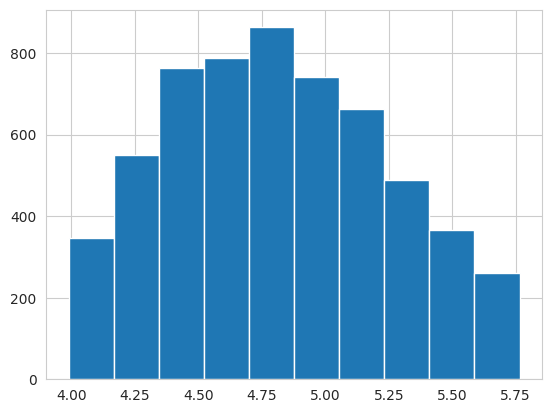

In [ ]:
# Possible consideration - logarithm transformation - can help to get better fit??
data['log_price'] = data.price.apply(np.log)
data['log2_price'] = data.log_price.apply(np.log)
data['log3_price'] = data.log2_price.apply(np.log)
data['log4_price'] = data.log3_price.apply(np.log)
data['log5_price'] = data.log4_price.apply(np.log)
data['sqrt_price'] = data.price.apply(np.sqrt)

data.log_price.hist()

# Kodowanie zmiennych kategorycznych do numerycznych
one-hot encoding - po to by móc zrobić SHAP i xgBoost (tylko numeryczne przyjmuje)

In [ ]:
# Zakoduj zmienne kategoryczne
data_encoded = data.copy()

# Konwertuj wszystkie boolean na int
bool_cols = data_encoded.select_dtypes(include='bool').columns
data_encoded[bool_cols] = data_encoded[bool_cols].astype(int)

# One-hot encoding dla zmiennych kategorycznych
categorical_cols = ['property_type_map', 'neighbourhood_cleansed_map']

for col in categorical_cols:
    if col in data_encoded.columns:
        dummies = pd.get_dummies(data_encoded[col], prefix=col, drop_first=True, dtype=int)
        # Zamień spacje na podkreślenia w nazwach dummy columns
        dummies.columns = dummies.columns.str.replace(' ', '_').str.replace('-', '_').str.replace('.', '')
        data_encoded = pd.concat([data_encoded.drop(col, axis=1), dummies], axis=1)

# Zamień spacje na podkreślenia we wszystkich nazwach kolumn (na wszelki wypadek)
data_encoded.columns = data_encoded.columns.str.replace(' ', '_')

data_encoded.head(10).T

0                                                  1                                                  2                                                  4                                                  6                                                  7                                                  8                                                  9                                                  10                                                 11
id                                                                                               3176                                               9991                                              14325                                              20858                                              22677                                              23834                                              26543                                              28156                                              30295                                              34854
listing_url                                                         https://www.airbnb.com/rooms/3176                  https://www.airbnb.com/rooms/9991                 https://www.airbnb.com/rooms/14325                 https://www.airbnb.com/rooms/20858                 https://www.airbnb.com/rooms/22677                 https://www.airbnb.com/rooms/23834                 https://www.airbnb.com/rooms/26543                 https://www.airbnb.com/rooms/28156                 https://www.airbnb.com/rooms/30295                 https://www.airbnb.com/rooms/34854
scrape_id                                                                              20250923202926                                     20250923202926                                     20250923202926                                     20250923202926                                     20250923202926                                     20250923202926                                     20250923202926                                     20250923202926                                     20250923202926                                     20250923202926
last_scraped                                                                               2025-09-24                                         2025-09-24                                         2025-09-24                                         2025-09-24                                         2025-09-24                                         2025-09-24                                         2025-09-24                                         2025-09-24                                         2025-09-24                                         2025-09-24
source                                                                                    city scrape                                        city scrape                                        city scrape                                        city scrape                                        city scrape                                        city scrape                                        city scrape                                        city scrape                                        city scrape                                        city scrape
name                                                                  Fabulous Flat in great Location                Geourgeous flat - outstanding views                Studio Apartment in Prenzlauer Berg                      Designer Loft in Berlin Mitte                      "Prenzel Garten" mit Terrasse                   Apartment in the heart of Berlin                Helmholtzplatz Bright&Spacious Apt.             Beautiful apartment in Prenzlauer Berg  PEACEFUL FLAT WITH VINTAGE TOUCH IN PRENZLAUER...                   Ku'damm-Nähe,sonnig,ruhig,Balkon
description                                         This beautiful first floor apartment  is situa...  4 bedroom with very large windows and outstand...  The apartment is l

## Numerical columns

In [ ]:
# get all numeric - just string creation
all_num_feats = [x for x in data_encoded.dtypes[data_encoded.dtypes != 'object'].index if not ('id' in x)
and not ('url' in x) and not ('price' in x)
and not ('longitude' in x) and not ('latitude' in x) ]

# print numerical features
print(" \n + ".join(all_num_feats))

accommodates 
 + bathrooms 
 + bedrooms 
 + beds 
 + minimum_nights 
 + maximum_nights 
 + minimum_minimum_nights 
 + maximum_minimum_nights 
 + minimum_maximum_nights 
 + maximum_maximum_nights 
 + minimum_nights_avg_ntm 
 + maximum_nights_avg_ntm 
 + availability_30 
 + availability_60 
 + availability_90 
 + availability_365 
 + availability_eoy 
 + estimated_occupancy_l365d 
 + estimated_revenue_l365d 
 + instant_bookable 
 + lat_dist_mean 
 + lon_dist_mean 
 + lat_dist_centre 
 + lon_dist_centre 
 + dist_from_center 
 + n_amenities 
 + is_cooking_basics 
 + is_wine_glasses 
 + is_crib 
 + is_hot_water_kettle 
 + is_baking_sheet 
 + is_stove 
 + is_high_chair 
 + is_books_and_reading_material 
 + is_cleaning_products 
 + is_patio_or_balcony 
 + is_heating 
 + is_tv 
 + is_bed_linens 
 + is_outdoor_dining_area 
 + is_oven 
 + is_toaster 
 + is_clothing_storage 
 + is_fire_extinguisher 
 + is_kitchen 
 + is_host_greets_you 
 + is_iron 
 + is_hot_water 
 + is_wifi 
 + is_smoke_alarm 


# Utworzenie zbioru treningowego (X-->data) i testowego (X_train)

## Stratyfikacja

In [ ]:
# Percentyle dla stratyfikacji
percentiles = np.percentile(data_encoded['price'], [25, 50, 75])
print(f"Percentyle: {percentiles}")

# Tworzy kategorie na podstawie percentyli
data_encoded['price_category'] = pd.cut(data_encoded['price'],
                                bins=[0] + list(percentiles) + [data_encoded['price'].max()],
                                labels=['Q1', 'Q2', 'Q3', 'Q4'],
                                include_lowest=True)

data_encoded['price_category'].value_counts()

Percentyle: [ 89. 120. 170.]


price_category
Q1    1479
Q2    1466
Q3    1442
Q4    1441
Name: count, dtype: int64

## Podzielenie zbioru

In [ ]:
# Wybieramy model ze stratyfikacją
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_encoded,
                                                    data_encoded.price,
                                                    test_size=0.40,
                                                    random_state=42,
                                                    stratify=data_encoded['price_category'])
X = X_train.copy()
# X_test jest de facto zbiorem walidacyjnym

In [ ]:
# get all categorical - just string creation
all_cat_feats = [x for x in X_train.dtypes[X_train.dtypes == 'object'].index if not ('id' in x) and not ('url' in x) and not ('price' in x) ]

# print numerical features
print(" \n + ".join(all_cat_feats))

last_scraped 
 + source 
 + name 
 + description 
 + neighbourhood_cleansed 
 + neighbourhood_group_cleansed 
 + property_type 
 + room_type 
 + bathrooms_text 
 + amenities 
 + has_availability 
 + calendar_last_scraped 
 + amenities_parsed


/tmp/ipython-input-2788691802.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled = df.groupby('category', group_keys=False).apply(


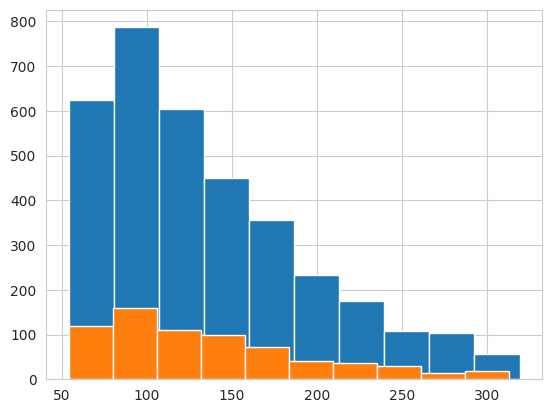

In [ ]:
def percentile_bins(series, n_bins):
    """Zwraca granice n_bins równych percentyli"""
    bins = np.percentile(series, np.linspace(0, 100, n_bins + 1))
    categories = pd.cut(series, bins=bins, labels=False, include_lowest=True)
    return bins, categories

# Użycie:
bins, categories = percentile_bins(y_train, 10)

df = pd.DataFrame({'values': y_train, 'category': categories})

sampled = df.groupby('category', group_keys=False).apply(
        lambda x: x.sample(frac=0.2, random_state=42)
    )
plt.hist(y_train)
plt.hist(sampled['values'], bins=10)
plt.show()

In [ ]:
# Dla porównania - dane bez stratyfikacji
from sklearn.model_selection import train_test_split
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(
                                                    data_encoded,
                                                    data_encoded.price,
                                                    test_size=0.20,
                                                    random_state=42)

(<Axes: >, <Axes: >, <Axes: >)

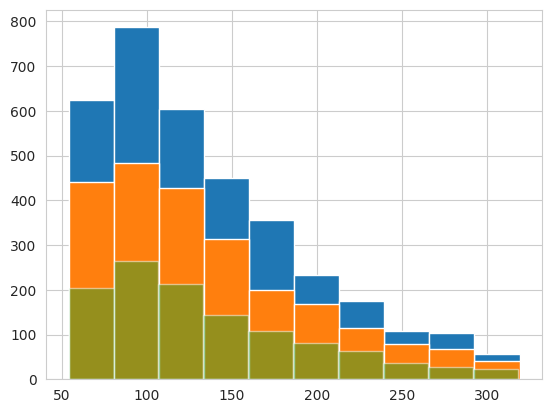

In [ ]:
# porównanie danych bez stratyfikacji i ze stratyfikacją
y_train.hist(), y_test.hist(), y_test_no.hist(alpha=0.5)

# MODELLING - regresja
OLS - ordinary least squares - zwykła metoda najmniejszych kwadratów

In [ ]:
X['log_price'] = X.price.apply(np.log)
X.head(3)

id                                      listing_url       scrape_id last_scraped       source                                              name                                        description                                        picture_url neighbourhood_cleansed neighbourhood_group_cleansed   latitude  longitude              property_type        room_type  accommodates  bathrooms bathrooms_text  bedrooms  beds                                          amenities  price  minimum_nights  maximum_nights  minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm has_availability  availability_30  availability_60  availability_90  availability_365 calendar_last_scraped  availability_eoy  estimated_occupancy_l365d  estimated_revenue_l365d  instant_bookable  lat_dist_mean  lon_dist_mean  lat_dist_centre  lon_dist_centre  dist_from_center  n_amenities                                   amenities_parsed  is_cooking_basics  is_wine_glasses  is_crib  is_hot_water_kettle  is_baking_sheet  is_stove  is_high_chair  is_books_and_reading_material  is_cleaning_products  is_patio_or_balcony  is_heating  is_tv  is_bed_linens  is_outdoor_dining_area  is_oven  is_toaster  is_clothing_storage  is_fire_extinguisher  is_kitchen  is_host_greets_you  is_iron  is_hot_water  is_wifi  is_smoke_alarm  is_coffee  is_outdoor_furniture  is_essentials  is_ethernet_connection  is_coffee_maker  is_washer  is_first_aid_kit  is_long_term_stays_allowed  is_extra_pillows_and_blankets  is_dining_table  is_dishes_and_silverware  is_hair_dryer  is_bathtub  is_hangers  is_freezer  is_carbon_monoxide_alarm  is_refrigerator  is_elevator  is_luggage_dropoff_allowed  is_room_darkening_shades  is_microwave  is_dishwasher  is_pack_n_play_travel_crib  is_private_entrance  is_free_washer___in_unit  is_single_level_home  is_private_patio_or_balcony  is_dedicated_workspace  is_laundromat_nearby  is_pets_allowed  is_portable_fans  is_free_street_parking  is_shampoo  is_drying_rack_for_clothing  is_self_check_in  is_coffee_maker_nespresso  is_paid_street_parking_off_premises  is_smart_lock  is_clothing_storage_wardrobe  is_shower_gel  is_free_parking_on_premises  is_blender  is_cleaning_available_during_stay  is_body_soap  is_central_heating  is_conditioner  is_lockbox  log_price  log2_price  log3_price  log4_price  log5_price  sqrt_price  property_type_map_Entire_guesthouse  property_type_map_Entire_home  property_type_map_Entire_loft  property_type_map_Entire_rental_unit  property_type_map_Entire_serviced_apartment  property_type_map_other  neighbourhood_cleansed_map_Brunnenstr_Nord  neighbourhood_cleansed_map_Brunnenstr_Süd  neighbourhood_cleansed_map_Düsseldorfer_Straße  neighbourhood_cleansed_map_Frankfurter_Allee_Nord  neighbourhood_cleansed_map_Frankfurter_Allee_Süd_FK  neighbourhood_cleansed_map_Helmholtzplatz  neighbourhood_cleansed_map_Moabit_Ost  neighbourhood_cleansed_map_Moabit_West  neighbourhood_cleansed_map_Prenzlauer_Berg_Nord  neighbourhood_cleansed_map_Prenzlauer_Berg_Nordwest  neighbourhood_cleansed_map_Prenzlauer_Berg_Süd  neighbourhood_cleansed_map_Prenzlauer_Berg_Südwest  neighbourhood_cleansed_map_Reuterstraße  neighbourhood_cleansed_map_Schöneberg_Nord  neighbourhood_cleansed_map_Schöneberg_Süd  neighbourhood_cleansed_map_Südliche_Friedrichstadt  neighbourhood_cleansed_map_Tempelhof  neighbourhood_cleansed_map_Tempelhofer_Vorstadt  neighbourhood_cleansed_map_other  neighbourhood_cleansed_map_südliche_Luisenstadt price_category
5413            36839962            https://www.airbnb.com/rooms/36839962  20250923202926   2025-09-24  city scrape    NEW FANCE FLAT CITY CENTER MITTE BEST LOCATION  Apartment with 2 rooms in Mitte AM ROSENTHALER...  https://a0.muscache.com/pictures/c5c886d0-c9ba...        Brunnenstr. Süd                        Mitte  52.529810  13.396100         Entire rental unit  Entire home/apt             4        1.0         1 bath       2.0   3.0  ["Cooking

To use:
 + neighbourhood_cleansed_map
 + property_type_map

+ C(neighbourhood_cleansed_map,  Treatment(reference="other"))
+ C(property_type_map,  Treatment(reference="other"))

## 1 Model fit - simple

one-hot code encoding - C oznacza ze to kategoryczna

*zmienne   P>|t| > 0.2 na pewno do wywalenia*

Znaczenie zmiennych:
* **accommodates** - liczba osób którą pomieści

Brakuje zmiennej '**guests included**' ale chyba accommodates to jest to samo



In [ ]:
# Our first linear model
model = smf.ols(
    '''price ~ accommodates
                   + bathrooms
                   + bedrooms
                   + beds
                   + minimum_nights
                   + maximum_nights
                   + availability_30
                   + availability_60
                   + availability_90
                   + availability_365
                   + is_wifi
                   + is_tv
                   + is_essentials
                   + n_amenities
                   + lat_dist_mean
                   + lon_dist_mean
                   + dist_from_center
                   + neighbourhood_cleansed_map
                   + property_type_map
    ''',
    data=data).fit()

# Inspect the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     115.0
Date:                Wed, 14 Jan 2026   Prob (F-statistic):               0.00
Time:                        20:27:43   Log-Likelihood:                -30359.
No. Observations:                5828   AIC:                         6.081e+04
Df Residuals:                    5784   BIC:                         6.110e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

### RMSE

In [ ]:
'''RMSE wciąż lewa strona jest bardziej skośna robimy logarytm z ceny
'''
np.sqrt(model.mse_resid)

np.float64(44.43333449527313)

In [ ]:
# Calculate residuals
residuals = data['price'] - (model.predict(model.model.data.frame))

# Calculate RMSE
rmse = np.sqrt(np.mean(residuals**2))
rmse

np.float64(44.2652862124606)

In [ ]:
import plotly.express as px
px.histogram(model.resid)

### Test Shapiro-Wilka

In [ ]:
from scipy.stats import shapiro
from scipy.stats import jarque_bera

stat, p_value = shapiro(residuals)

print(f"Statystyka testu Shapiro-Wilka: {stat:.3f}")
print(f"Wartość p: {p_value:.3f}")

# Interpretacja wyniku
if p_value > 0.05:
    print("Brak dowodów na odrzucenie hipotezy zerowej – reszty pochodzą z rozkładu normalnego.")
else:
    print("Odrzucamy hipotezę zerową – reszty nie pochodzą z rozkładu normalnego.")
print()

stat, p_value = jarque_bera(model.resid)

print(f"Statystyka testu Jarque-Bera: {stat:.3f}")
print(f"Wartość p: {p_value:.3f}")

# Interpretacja
if p_value < 0.05:
    print("Odrzucamy hipotezę zerową – dane nie pochodzą z rozkładu normalnego.")
else:
    print("Brak dowodów na odrzucenie hipotezy zerowej – dane mogą pochodzić z rozkładu normalnego.")


Statystyka testu Shapiro-Wilka: 0.970
Wartość p: 0.000
Odrzucamy hipotezę zerową – reszty nie pochodzą z rozkładu normalnego.

Statystyka testu Jarque-Bera: 716.566
Wartość p: 0.000
Odrzucamy hipotezę zerową – dane nie pochodzą z rozkładu normalnego.


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5828.



# MODELE xgBOOST

scikitlearnowy troche

gradient boosting

różne opcje adaptacji, różne optymalizacje

xgBOOST - wprowadza dużo zmiennych, pokonuje wszystkie inne drzewa losowe, zaimplementowany pod spodem przez matematyczne wyprowadzenia, można go trenować przy wykorzystaniu karty graficznej. Szybciej działa.

Duże sieci neuronowe - na kartach graficznych - do macierzy.

n_estimators - liczba estymatorów, czyli liczba drzew które są wykorzystywane tutaj

wyszukiwanie hiperparametrów - grid search, random search, bayesian opt,

---> w finale - brute force, trzeba zobaczyć które hiperparametry dadzą najlepsze wyniki  

In [ ]:
# ?xgboost.XGBRegressor

# https://xgboost.readthedocs.io/en/stable/

## xgBoost v1

In [ ]:
# XGBoost simple

variables = ['bathrooms', 'bedrooms', 'beds', 'accommodates', 'minimum_nights']

# data_subset = X_train.loc[:, variables + ['price']]
# data_subset = data_subset.iloc[:5000,:] # oryginalnie

#X = preprocessing.scale(X) #We don't have to scale it as trees don't care about distributions, means, and all that smart stuff
X = X_train.loc[:, variables]
y = np.array(X_train.price)

model = xgboost.XGBRegressor(n_estimators=200, verbosity=1)
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# wymiar danych do analizy
X.shape, X_train.shape, X_test.shape

((3496, 5), (3496, 150), (2332, 150))

### RMSE - zbiór treningowy

In [ ]:
# What does it even mean? Todo: check different error functions and how they can be explained
# Did we do a proper training and prediction? NO - we need to have proper TRAIN and TEST sets! Todo at home ;)

predicted = model.predict(X)
# list(zip(data_subset.price[0:10], predicted[0:10]))

# rmse dla modelu na zbiorze treningowym
np.sqrt(mean_squared_error(y, predicted))

np.float64(38.930880710895714)

In [ ]:
px.histogram(X_train.price - predicted )

### RMSE - zbiór walidacyjny

In [ ]:
# What does it even mean? Todo: check different error functions and how they can be explained
# Did we do a proper training and prediction? NO - we need to have proper TRAIN and TEST sets! Todo at home ;)
X_val = X_test.loc[:, variables]
y_val = np.array(X_test.price)

predicted_test = model.predict(X_val)
residuals = (X_test.price - predicted_test)

# Calculate RMSE dla zbioru testowego
rmse = np.sqrt(mean_squared_error(y_val, predicted_test))
print(f"RMSE: {rmse:.2f}")

# Inne metryki - MAE = mean absolute error
mae = np.mean(np.abs(residuals))
print(f"MAE: {mae:.2f}")

RMSE: 50.37
MAE: 37.43


In [ ]:
px.histogram(residuals)

## xgBoost v2 - all

In [ ]:
# XGBoost

variables = [
    'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights',
    # 'minimum_minimum_nights', 'maximum_minimum_nights',
    # 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm',
    # 'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
    # 'availability_90', 'availability_365', 'availability_eoy',
    # 'estimated_occupancy_l365d', 'estimated_revenue_l365d',
    'instant_bookable',
    'lat_dist_mean', 'lon_dist_mean', 'lat_dist_centre', 'lon_dist_centre',
    'dist_from_center', 'n_amenities', 'is_cooking_basics', 'is_wine_glasses',
    'is_crib', 'is_hot_water_kettle', 'is_baking_sheet', 'is_stove',
    'is_high_chair', 'is_books_and_reading_material', 'is_cleaning_products',
    'is_patio_or_balcony', 'is_heating', 'is_tv', 'is_bed_linens',
    'is_outdoor_dining_area', 'is_oven', 'is_toaster', 'is_clothing_storage',
    'is_fire_extinguisher', 'is_kitchen', 'is_host_greets_you', 'is_iron',
    'is_hot_water', 'is_wifi', 'is_smoke_alarm', 'is_coffee',
    'is_outdoor_furniture', 'is_essentials', 'is_ethernet_connection',
    'is_coffee_maker', 'is_washer', 'is_long_term_stays_allowed',
    'is_extra_pillows_and_blankets', 'is_dining_table', 'is_dishes_and_silverware',
    'is_hair_dryer', 'is_bathtub', 'is_hangers', 'is_freezer',
    'is_refrigerator', 'is_elevator', 'is_luggage_dropoff_allowed',
    'is_room_darkening_shades', 'is_microwave', 'is_dishwasher',
    'is_pack_n_play_travel_crib', 'is_private_entrance', 'is_free_washer___in_unit',
    'is_single_level_home', 'is_private_patio_or_balcony', 'is_dedicated_workspace',
    'is_laundromat_nearby', 'is_pets_allowed', 'is_portable_fans',
    'is_free_street_parking', 'is_shampoo', 'is_drying_rack_for_clothing',
    'is_self_check_in', 'is_coffee_maker_nespresso', 'is_smart_lock',
    'is_clothing_storage_wardrobe', 'is_shower_gel', 'is_free_parking_on_premises',
    'is_blender', 'is_cleaning_available_during_stay', 'is_body_soap',
    'is_central_heating', 'is_conditioner', 'is_lockbox',
    'property_type_map_Entire_guesthouse', 'property_type_map_Entire_home',
    'property_type_map_Entire_loft', 'property_type_map_Entire_rental_unit',
    'property_type_map_Entire_serviced_apartment', 'property_type_map_other',
    'neighbourhood_cleansed_map_Brunnenstr_Nord',
    'neighbourhood_cleansed_map_Brunnenstr_Süd',
    'neighbourhood_cleansed_map_Düsseldorfer_Straße',
    'neighbourhood_cleansed_map_Frankfurter_Allee_Nord',
    'neighbourhood_cleansed_map_Frankfurter_Allee_Süd_FK',
    'neighbourhood_cleansed_map_Helmholtzplatz',
    'neighbourhood_cleansed_map_Moabit_Ost',
    'neighbourhood_cleansed_map_Moabit_West',
    'neighbourhood_cleansed_map_Prenzlauer_Berg_Nord',
    'neighbourhood_cleansed_map_Prenzlauer_Berg_Nordwest',
    'neighbourhood_cleansed_map_Prenzlauer_Berg_Süd',
    'neighbourhood_cleansed_map_Prenzlauer_Berg_Südwest',
    'neighbourhood_cleansed_map_Reuterstraße',
    'neighbourhood_cleansed_map_Schöneberg_Nord',
    'neighbourhood_cleansed_map_Schöneberg_Süd',
    'neighbourhood_cleansed_map_Südliche_Friedrichstadt',
    'neighbourhood_cleansed_map_Tempelhof',
    'neighbourhood_cleansed_map_Tempelhofer_Vorstadt',
    'neighbourhood_cleansed_map_other',
    'neighbourhood_cleansed_map_südliche_Luisenstadt'
]

print(variables)

# data_subset = data_encoded.loc[:, variables + ['price']]

#X = preprocessing.scale(X) #We don't have to scale it as trees don't care about distributions, means, and all that smart stuff
X = X_train.loc[:, variables]
y = np.array(X_train.price)

model = xgboost.XGBRegressor(n_estimators=200, verbosity=1)
model.fit(X, y)

['accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'instant_bookable', 'lat_dist_mean', 'lon_dist_mean', 'lat_dist_centre', 'lon_dist_centre', 'dist_from_center', 'n_amenities', 'is_cooking_basics', 'is_wine_glasses', 'is_crib', 'is_hot_water_kettle', 'is_baking_sheet', 'is_stove', 'is_high_chair', 'is_books_and_reading_material', 'is_cleaning_products', 'is_patio_or_balcony', 'is_heating', 'is_tv', 'is_bed_linens', 'is_outdoor_dining_area', 'is_oven', 'is_toaster', 'is_clothing_storage', 'is_fire_extinguisher', 'is_kitchen', 'is_host_greets_you', 'is_iron', 'is_hot_water', 'is_wifi', 'is_smoke_alarm', 'is_coffee', 'is_outdoor_furniture', 'is_essentials', 'is_ethernet_connection', 'is_coffee_maker', 'is_washer', 'is_long_term_stays_allowed', 'is_extra_pillows_and_blankets', 'is_dining_table', 'is_dishes_and_silverware', 'is_hair_dryer', 'is_bathtub', 'is_hangers', 'is_freezer', 'is_refrigerator', 'is_elevator', 'is_luggage_dropoff_allowed', 'is_room_d

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

### RMSE - zbiór treningowy

In [ ]:
# What does it even mean? Todo: check different error functions and how they can be explained
# Did we do a proper training and prediction? NO - we need to have proper TRAIN and TEST sets! Todo at home ;)

predicted = model.predict(X)
# list(zip(data_subset.price[0:10], predicted[0:10]))

# rmse dla modelu na zbiorze treningowym
np.sqrt(mean_squared_error(y, predicted))

np.float64(4.391352963547487)

In [ ]:
px.histogram(X_train.price - predicted)

### RMSE - zbiór walidacyjny

In [ ]:
# What does it even mean? Todo: check different error functions and how they can be explained
# Did we do a proper training and prediction? NO - we need to have proper TRAIN and TEST sets! Todo at home ;)
X_val = X_test.loc[:, variables]
y_val = np.array(X_test.price)

predicted_test = model.predict(X_val)
residuals = (X_test.price - predicted_test)

# Calculate RMSE dla zbioru testowego
rmse = np.sqrt(mean_squared_error(y_val, predicted_test))
print(f"RMSE: {rmse:.2f}")

# Inne metryki - MAE = mean absolute error
mae = np.mean(np.abs(residuals))
print(f"MAE: {mae:.2f}")

RMSE: 41.95
MAE: 30.60


In [ ]:
px.histogram(residuals)

## xgBoost v3 - final
Takie same zmienne wykorzystane jak w finalnym modelu liniowym (tylko bez sqrt).

In [ ]:
# XGBoost

variables = [
    'bedrooms',
    'accommodates',
    'bathrooms',
    'dist_from_center',
    'lat_dist_mean',
    'lon_dist_mean',
    'is_dishwasher',
    'property_type_map_Entire_serviced_apartment',
    'is_hot_water',
    'neighbourhood_cleansed_map_other',
    'is_lockbox',
    'n_amenities',
    'is_dishes_and_silverware',
    'is_patio_or_balcony',
    'neighbourhood_cleansed_map_Schöneberg_Süd',
    'neighbourhood_cleansed_map_Prenzlauer_Berg_Südwest',
    'neighbourhood_cleansed_map_Moabit_Ost',
    'is_self_check_in',
    'is_fire_extinguisher',
    'is_private_patio_or_balcony',
    'is_bathtub',
    'is_tv'
]

variables_used = variables

print(variables)

#X = preprocessing.scale(X) #We don't have to scale it as trees don't care about distributions, means, and all that smart stuff
X = X_train.loc[:, variables]
y = np.array(X_train.price)

model = xgboost.XGBRegressor(n_estimators=200, verbosity=1)
model.fit(X, y)

# ### OPCJA DLA ZBIORU TESTOWEGO ORAZ WALIDACYJNEGO - NISKA POPRAWA, BEZ SENSU
# X_val = X_test.loc[:, variables]
# y_val = np.array(X_test.price)
#
# model = xgboost.XGBRegressor(
#     n_estimators=1000,  # Maksymalnie 1000 drzew
#     early_stopping_rounds=50  # Zatrzymaj jeśli przez 50 rund brak poprawy
# )

# model.fit(
#     X, y,
#     eval_set=[(X_val, y_val)],  # KLUCZOWE!
#     verbose=False
# )

['bedrooms', 'accommodates', 'bathrooms', 'dist_from_center', 'lat_dist_mean', 'lon_dist_mean', 'is_dishwasher', 'property_type_map_Entire_serviced_apartment', 'is_hot_water', 'neighbourhood_cleansed_map_other', 'is_lockbox', 'n_amenities', 'is_dishes_and_silverware', 'is_patio_or_balcony', 'neighbourhood_cleansed_map_Schöneberg_Süd', 'neighbourhood_cleansed_map_Prenzlauer_Berg_Südwest', 'neighbourhood_cleansed_map_Moabit_Ost', 'is_self_check_in', 'is_fire_extinguisher', 'is_private_patio_or_balcony', 'is_bathtub', 'is_tv']


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

### RMSE - zbiór treningowy

In [ ]:
# What does it even mean? Todo: check different error functions and how they can be explained
# Did we do a proper training and prediction? NO - we need to have proper TRAIN and TEST sets! Todo at home ;)

predicted = model.predict(X)
# list(zip(data_subset.price[0:10], predicted[0:10]))

# rmse dla modelu na zbiorze treningowym
np.sqrt(mean_squared_error(y, predicted))

np.float64(8.658821958194054)

In [ ]:
px.histogram( X_train.price - predicted )

### RMSE - zbiór walidacyjny

In [ ]:
# What does it even mean? Todo: check different error functions and how they can be explained
# Did we do a proper training and prediction? NO - we need to have proper TRAIN and TEST sets! Todo at home ;)
X_val = X_test.loc[:, variables]
y_val = np.array(X_test.price)

predicted_test = model.predict(X_val)
residuals = (X_test.price - predicted_test)

# Calculate RMSE dla zbioru testowego
rmse = np.sqrt(mean_squared_error(y_val, predicted_test))
print(f"RMSE: {rmse:.2f}")

# Inne metryki - MAE = mean absolute error
mae = np.mean(np.abs(residuals))
print(f"MAE: {mae:.2f}")

RMSE: 45.81
MAE: 34.18


### Dla OLS jest RMSE = 47.07, a MAE = 34.59 (Berlin)

In [ ]:
px.histogram(residuals)

In [ ]:
# Eksport parametrów z xgBoosta
# 1. Feature importances
feature_importance = pd.DataFrame({
    'feature': variables,  # Używamy variables zamiast X.columns
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

feature_importance.to_excel('xgboost_feature_importance.xlsx', index=False)
print("\n=== Feature Importance ===")
print(feature_importance)

# 2. Parametry modelu (hiperparametry)
params = model.get_params()
params_df = pd.DataFrame(params.items(), columns=['parameter', 'value'])
params_df.to_excel('xgboost_params.xlsx', index=False)

# 3. Kompletny raport (oba w jednym pliku)
with pd.ExcelWriter('xgboost_full_report.xlsx') as writer:
    feature_importance.to_excel(writer, sheet_name='Feature Importance', index=False)
    params_df.to_excel(writer, sheet_name='Model Parameters', index=False)

print("\nParametry wyeksportowane do plików Excel!")

# 4. Opcjonalnie: zapisz cały model
model.save_model('xgboost_model.json')
print("Model zapisany do xgboost_model.json")


=== Feature Importance ===
                                              feature  importance
7         property_type_map_Entire_serviced_apartment    0.212653
1                                        accommodates    0.082599
0                                            bedrooms    0.070162
17                                   is_self_check_in    0.060944
2                                           bathrooms    0.058387
6                                       is_dishwasher    0.057396
16              neighbourhood_cleansed_map_Moabit_Ost    0.048687
15  neighbourhood_cleansed_map_Prenzlauer_Berg_Süd...    0.047213
12                           is_dishes_and_silverware    0.035388
18                               is_fire_extinguisher    0.030434
8                                        is_hot_water    0.030357
13                                is_patio_or_balcony    0.030140
10                                         is_lockbox    0.029315
11                                        n_amen

# !!! Wynik
Bardzo dobry na danych treningowych, średni na danych validacyjnych (ale nieco lepszy od OLS).

Lepsze RMSE, ale duża skośność. Jednak, tutaj już nieistotne czy ten rozkład jest normalny czy nie.

DRZEWA DECYZYJNE TO MODELE NIELINIOWE - WIĘC NIE PATRZYMY NA ROZKŁAD NORMALNY

# OPŁACALNOŚĆ MIESZKAŃ - Estymacja ceny m2, powierzchni, opłacalności

In [ ]:
# data_encoded.T.head(100)

## Normalizacja dist_from_center

In [ ]:
data_encoded['dist_from_center'].describe()

# Min-Max normalization of dist_from_center
min_val = data_encoded['dist_from_center'].min()
max_val = data_encoded['dist_from_center'].max()

data_encoded['dist_from_center'] = (data_encoded['dist_from_center'] - min_val) / (max_val - min_val)

data_encoded['dist_from_center'].describe()

count    5828.000000
mean        0.182648
std         0.140300
min         0.000000
25%         0.093724
50%         0.148716
75%         0.217565
max         1.000000
Name: dist_from_center, dtype: float64

## Założenia, obliczenia: powierzchni, ceny mieszkania, i opłacalności

In [ ]:
X_all = data_encoded.loc[:, variables]
predictions = model.predict(X_all)

data_encoded['price_predictions'] = predictions
data_encoded['price_residuals'] = residuals
data_encoded['price_residuals_abs_err'] = data_encoded['price_residuals'].abs()

# Praga - założenia zmiennej - 5000 eur/m2 na obrzeżach, 8000 eur/m2 w centrum
# założenia - średnie mieszkanie ma 50 m2
data_encoded['m2_price'] = 5000 + data_encoded['dist_from_center']*3000

# Praga - typowa kawalerka ma 30 m2 = 1 łazienka i 1 sypialnia
data_encoded['area_m2'] = 20 + data_encoded['bedrooms']*10 + data_encoded['bathrooms']*5 ### można jednak założyć, że w Pradze mieszkania są nieco mniejsze
data_encoded['apt_purchase_price'] = data_encoded['area_m2']*data_encoded['m2_price']
# Czas do zwrotu inwestycji - w dniach
data_encoded['payback_time'] = data_encoded['apt_purchase_price']/data_encoded['price_predictions']

data_encoded.head(10).T

0                                                  1                                                  2                                                  4                                                  6                                                  7                                                  8                                                  9                                                  10                                                 11
id                                                                                               3176                                               9991                                              14325                                              20858                                              22677                                              23834                                              26543                                              28156                                              30295                                              34854
listing_url                                                         https://www.airbnb.com/rooms/3176                  https://www.airbnb.com/rooms/9991                 https://www.airbnb.com/rooms/14325                 https://www.airbnb.com/rooms/20858                 https://www.airbnb.com/rooms/22677                 https://www.airbnb.com/rooms/23834                 https://www.airbnb.com/rooms/26543                 https://www.airbnb.com/rooms/28156                 https://www.airbnb.com/rooms/30295                 https://www.airbnb.com/rooms/34854
scrape_id                                                                              20250923202926                                     20250923202926                                     20250923202926                                     20250923202926                                     20250923202926                                     20250923202926                                     20250923202926                                     20250923202926                                     20250923202926                                     20250923202926
last_scraped                                                                               2025-09-24                                         2025-09-24                                         2025-09-24                                         2025-09-24                                         2025-09-24                                         2025-09-24                                         2025-09-24                                         2025-09-24                                         2025-09-24                                         2025-09-24
source                                                                                    city scrape                                        city scrape                                        city scrape                                        city scrape                                        city scrape                                        city scrape                                        city scrape                                        city scrape                                        city scrape                                        city scrape
name                                                                  Fabulous Flat in great Location                Geourgeous flat - outstanding views                Studio Apartment in Prenzlauer Berg                      Designer Loft in Berlin Mitte                      "Prenzel Garten" mit Terrasse                   Apartment in the heart of Berlin                Helmholtzplatz Bright&Spacious Apt.             Beautiful apartment in Prenzlauer Berg  PEACEFUL FLAT WITH VINTAGE TOUCH IN PRENZLAUER...                   Ku'damm-Nähe,sonnig,ruhig,Balkon
description                                         This beautiful first floor apartment  is situa...  4 bedroom with very large windows and outstand...  The apartment is l

## Podsumowanie opłacalności

In [ ]:
# Agregacja wyników - Berlin
summary = data_encoded[['price','price_predictions','price_residuals','price_residuals_abs_err','area_m2','apt_purchase_price','payback_time']].describe()
summary.style.format({
    'price': '{:.1f}',
    'price_predictions': '{:.1f}',
    'price_residuals': '{:.1f}',
    'price_residuals_abs_err': '{:.1f}',
    'area_m2': '{:.1f}',
    'apt_purchase_price': '{:,.0f}',
    'payback_time': '{:,.0f}'
})

## Analiza outlierów

In [ ]:
# Top 10 z wybranymi kolumnami
cols = ['price', 'price_predictions', 'price_residuals', 'bedrooms', 'bathrooms', 'accommodates','area_m2','dist_from_center','apt_purchase_price','payback_time']
data_encoded.nsmallest(10, 'price_residuals')[cols]

price  price_predictions  price_residuals  bedrooms  bathrooms  accommodates  area_m2  dist_from_center  apt_purchase_price  payback_time
11458  147.0         261.224182      -167.262482       4.0        1.0             9     65.0          0.246909       373147.270835   1428.456079
296     62.0         202.367920      -140.523041       2.0        1.5             4     47.5          0.072902       247888.488712   1224.939649
6786   145.0         263.336395      -139.232513       2.0        2.5             6     52.5          0.082005       275415.720571   1045.870322
254     95.0         231.240082      -135.170975       1.0        3.0             4     45.0          0.092894       237540.672789   1027.246968
11747   56.0         129.121262      -132.768021       1.0        1.0             2     35.0          0.382679       215181.330915   1666.505797
8500   130.0         251.113525      -127.367157       3.0        2.0             6     60.0          0.523838       394290.796734   1570.169493
1103    98.0         227.391281      -124.701935       3.0        2.0             6     60.0          0.070785       312741.302490   1375.344301
8142    60.0         200.093002      -123.456726       1.0        1.0             2     35.0          0.110651       186618.337443    932.657990
13199   85.0         145.580429      -118.470734       2.0        2.0             4     50.0          0.235522       285328.344973   1959.936145
10157   91.0         165.325653      -118.102921       2.0        2.0             4     50.0          0.186680       278001.951337   1681.541528

In [ ]:
# Top 10 z wybranymi kolumnami
cols = ['price', 'price_predictions', 'price_residuals', 'bedrooms', 'bathrooms', 'accommodates','area_m2','dist_from_center','apt_purchase_price','payback_time']
data_encoded.nlargest(10, 'price_residuals')[cols]

price  price_predictions  price_residuals  bedrooms  bathrooms  accommodates  area_m2  dist_from_center  apt_purchase_price  payback_time
4796   291.0          75.398071       208.526695       2.0        1.0             4     45.0          0.432094       283332.715571   3757.824447
7030   274.0          87.788620       198.436798       1.0        1.0             2     35.0          0.080030       183403.120554   2089.144590
7049   277.0          75.607376       193.667976       1.0        1.0             2     35.0          0.045297       179756.163227   2377.495061
11259  298.0         139.963715       191.786430       2.0        1.0             4     45.0          0.136736       243459.380598   1739.446408
8155   315.0         159.263947       183.355713       1.0        2.0             4     40.0          0.102322       212278.600048   1332.872911
8851   250.0         101.087334       178.295692       1.0        1.0             2     35.0          0.172129       193073.496757   1909.967250
9061   297.0         141.633377       171.165291       2.0        2.0             4     50.0          0.120804       268120.582573   1893.060719
6239   303.0         146.046036       170.155945       2.0        1.0             4     45.0          0.091280       237322.778191   1624.986101
9745   308.0          78.445755       161.231079       2.0        1.0             5     45.0          0.219283       254603.176705   3245.595338
12594  250.0          97.341019       159.912544       1.0        1.0             3     35.0          0.296813       206165.343379   2117.969857

In [ ]:
# Top 10 z wybranymi kolumnami
cols = ['price', 'price_predictions', 'price_residuals', 'bedrooms', 'bathrooms', 'accommodates','area_m2','dist_from_center','apt_purchase_price','payback_time']
data_encoded.nsmallest(10, 'price_predictions')[cols]

price  price_predictions  price_residuals  bedrooms  bathrooms  accommodates  area_m2  dist_from_center  apt_purchase_price  payback_time
9575    56.0          18.696255         0.204525       2.0        1.0             4     45.0          0.347112       271860.052967  14540.883021
14173   94.0          22.031864         8.003448       2.0        1.0             3     45.0          0.188766       250483.357337  11369.140416
2191    55.0          25.402645              NaN       1.0        1.0             3     35.0          0.263058       202621.136257   7976.379443
5353    57.0          26.008776              NaN       1.0        1.0             4     35.0          0.244142       200634.881070   7714.122468
5288    70.0          26.161522         9.265614       1.0        1.0             3     35.0          0.202977       196312.574764   7503.866764
5978    70.0          26.218393              NaN       0.0        1.0             4     25.0          0.222456       141684.235843   5404.001461
13015   66.0          27.828650              NaN       1.0        1.0             3     35.0          0.224406       198562.594960   7135.186162
2776    99.0          31.545471        52.430527       1.0        1.0             3     35.0          0.220528       198155.406258   6281.580169
26      99.0          32.039906        48.513489       0.0        1.0             1     25.0          0.264136       144810.180391   4519.681875
6780    70.0          32.239628        -1.315140       0.0        1.0             1     25.0          0.216749       141256.168869   4381.445393

# Analiza SHAP-a

nie ma ograniczeń ile wartości SHAP-a mogą wynosić.

Przy klasyfikacji - powinny sumować się do 1.

Guest_included - ile może być gości.

Bathrooms - może być korelacja z bedrooms.

### Google Drive connection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load & Save

In [ ]:
import pickle
import os

# x=X_val.iloc[:100] ### wycinek danych
# y=y_val[:100]
x=X_val
y=y_val
force_restart = 0

# Prefix dla nazw plików i nazwy zmiennych
pre = 'predictions_Berlin_XGB'
expl = 'explainer'
shap_vals = 'shap_values'

# Ścieżka do Google Drive
SAVE_PATH = '/content/drive/MyDrive/shap_models/'

# Sprawdź czy pliki istnieją
files_exist = all([
    os.path.exists(f'{pre}_X_data.pkl'),
    os.path.exists(f'{pre}_{shap_vals}.pkl'),
    os.path.exists(f'{pre}_{expl}.pkl')
])

# Pełne ścieżki do plików
x_data_path = f'{SAVE_PATH}{pre}_X_data.pkl'
shap_vals_path = f'{SAVE_PATH}{pre}_{shap_vals}.pkl'
explainer_path = f'{SAVE_PATH}{pre}_{expl}.pkl'

# Sprawdź czy pliki istnieją
files_exist = all([
    os.path.exists(x_data_path),
    os.path.exists(shap_vals_path),
    os.path.exists(explainer_path)
])

# Logika: wczytaj tylko jeśli pliki istnieją & force_restart == 0
if files_exist and force_restart == 0:
    print("📂 Wczytywanie zapisanych danych SHAP z Google Drive...")

    with open(x_data_path, 'rb') as f:
        X = pickle.load(f)

    with open(shap_vals_path, 'rb') as f:
        shap_values = pickle.load(f)

    with open(explainer_path, 'rb') as f:
        explainer = pickle.load(f)

    print("✓ Dane SHAP wczytane pomyślnie z Google Drive!")

# Logika: licz ponownie jeśli force_restart == 1 lub brak plików
else:
    if force_restart == 1:
        print("🔄 force_restart=1 - Pomijam wczytywanie, tworzę model od nowa...")
    else:
        print("⚙️  Pliki SHAP nie znalezione. Tworzenie nowego modelu SHAP...")

    print("⏳ To może potrwać kilka minut...")

    ###############################
    # Wykonaj modelowanie SHAP ####
    explainer = shap.Explainer(model.predict, x)
    shap_values = explainer(x)
    ###############################

    print("💾 Zapisywanie wyników do Google Drive...")

    # Zapisz wyniki do Google Drive
    with open(x_data_path, 'wb') as f:
        pickle.dump(x, f)

    with open(shap_vals_path, 'wb') as f:
        pickle.dump(shap_values, f)

    with open(explainer_path, 'wb') as f:
        pickle.dump(explainer, f)

    print(f"✓ Model SHAP utworzony i zapisany w {SAVE_PATH}!")

# Weryfikacja
print(f"\n📊 Kształt X: {x.shape}")
print(f"📊 Liczba obserwacji: {len(shap_values)}")

# Wyświetl rozmiary plików w Google Drive
print(f"\n📁 Pliki w {SAVE_PATH}:")
!ls -lh "{SAVE_PATH}"{pre}_*.pkl 2>/dev/null || echo "Pliki zapisane"

📂 Wczytywanie zapisanych danych SHAP z Google Drive...
✓ Dane SHAP wczytane pomyślnie z Google Drive!

📊 Kształt X: (2332, 22)
📊 Liczba obserwacji: 2332

📁 Pliki w /content/drive/MyDrive/shap_models/:
-rw------- 1 root root 808K Jan 14 18:53 /content/drive/MyDrive/shap_models/predictions_Berlin_XGB_explainer.pkl
-rw------- 1 root root 822K Jan 14 18:53 /content/drive/MyDrive/shap_models/predictions_Berlin_XGB_shap_values.pkl
-rw------- 1 root root 421K Jan 14 18:53 /content/drive/MyDrive/shap_models/predictions_Berlin_XGB_X_data.pkl


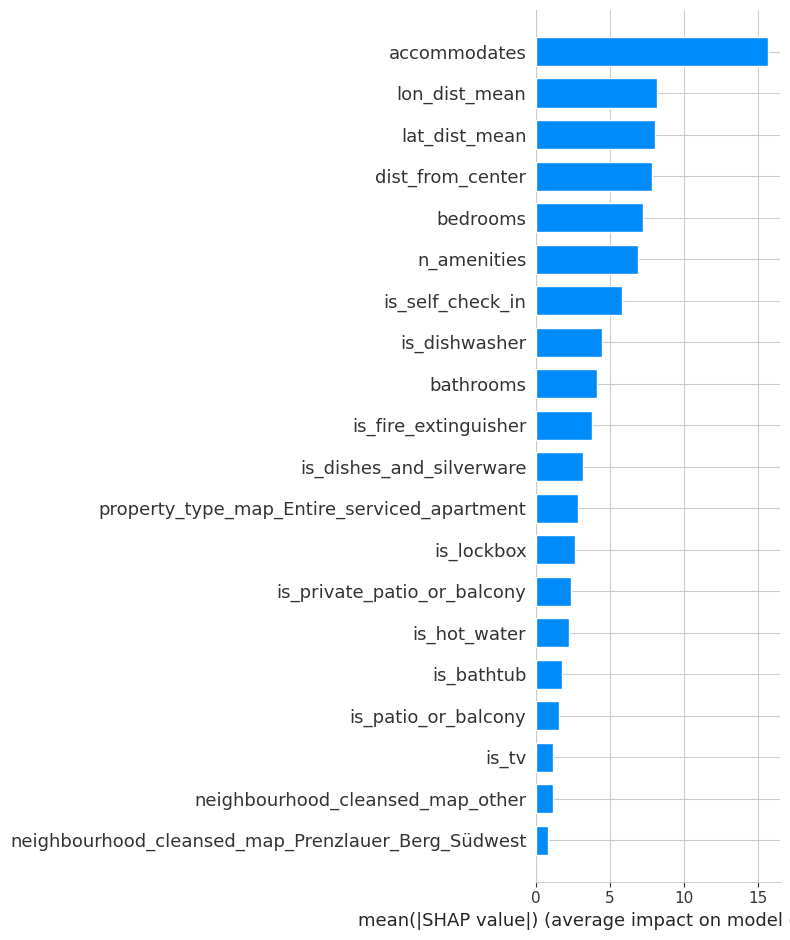

In [ ]:
shap.summary_plot(shap_values, x, plot_type="bar")

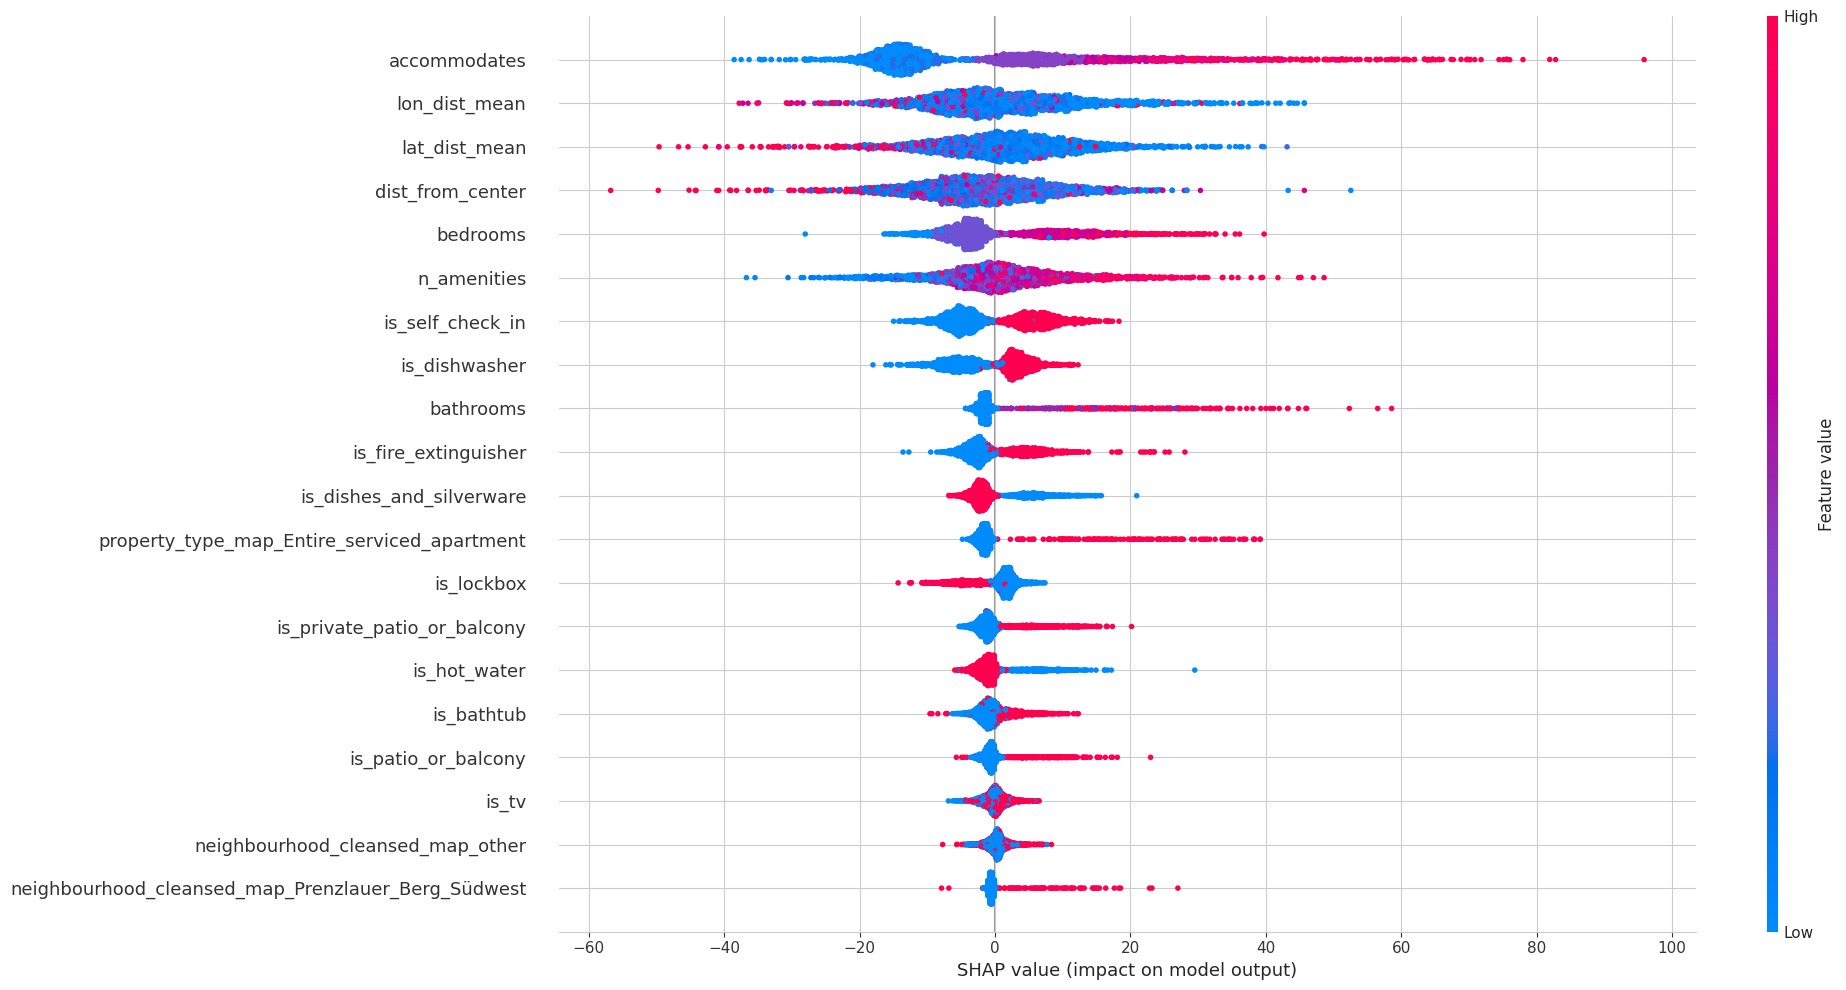

In [ ]:
#From official documentation:
'''The summary plot combines feature importance with feature effects.
Each point on the summary plot is a Shapley value for a feature and an instance.
The position on the y-axis is determined by the feature and on the x-axis by the Shapley value.
The color represents the value of the feature from low to high.
Overlapping points are jittered in y-axis direction, so we get a sense of the distribution
of the Shapley values per feature. The features are ordered according to their importance.'''
# So from this plot we can read that guests_included and bedrooms are the most important variables
#    and high number of guests_included/bedrooms is linked to higher price
shap.summary_plot(shap_values, features=x, feature_names=x.columns, plot_size=(20,10))

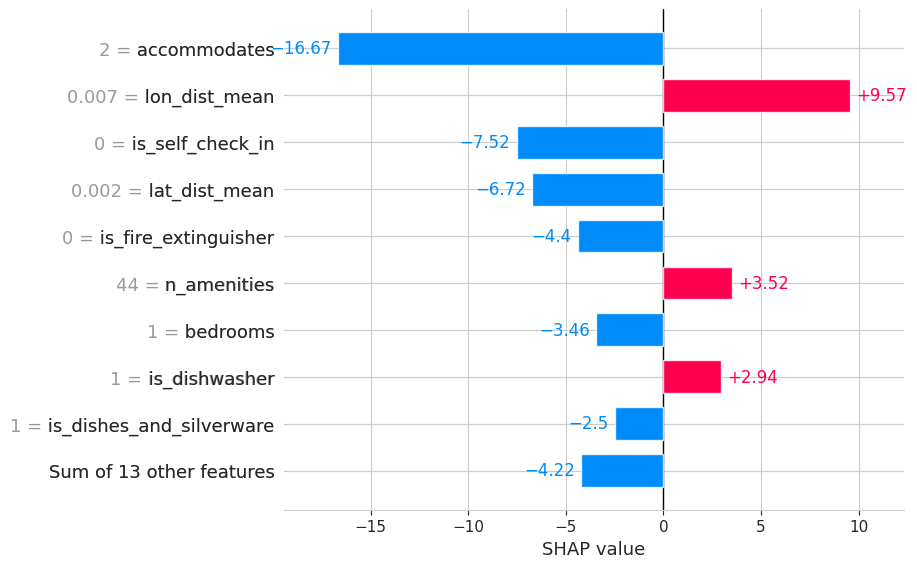

In [ ]:
shap.plots.bar(shap_values[0])

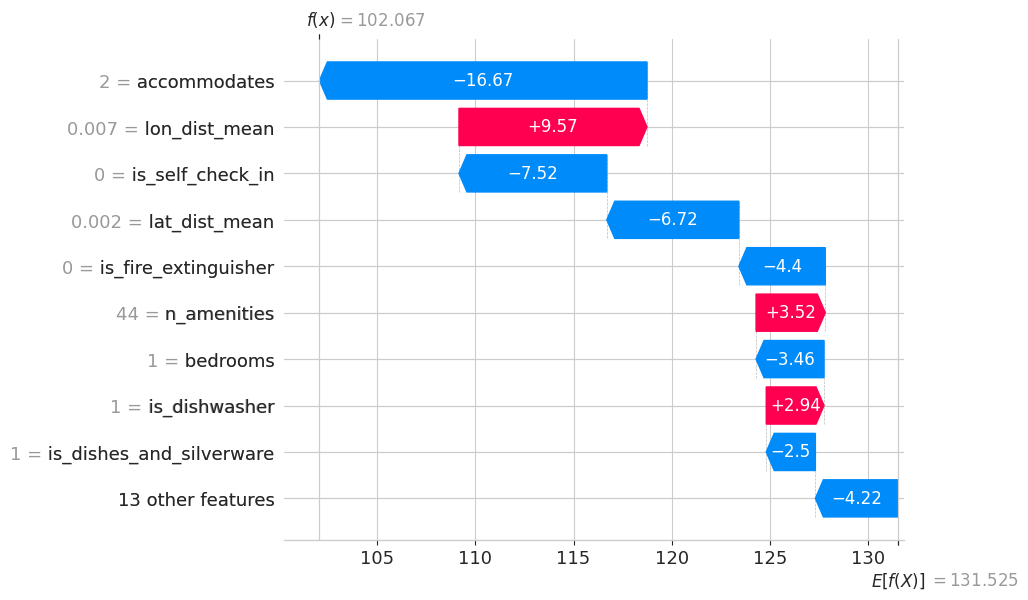

In [ ]:
shap.plots.waterfall(shap_values[0])

Najbardziej typowy przykład: indeks 440
Predykcja: 134.32, Średnia: 134.44


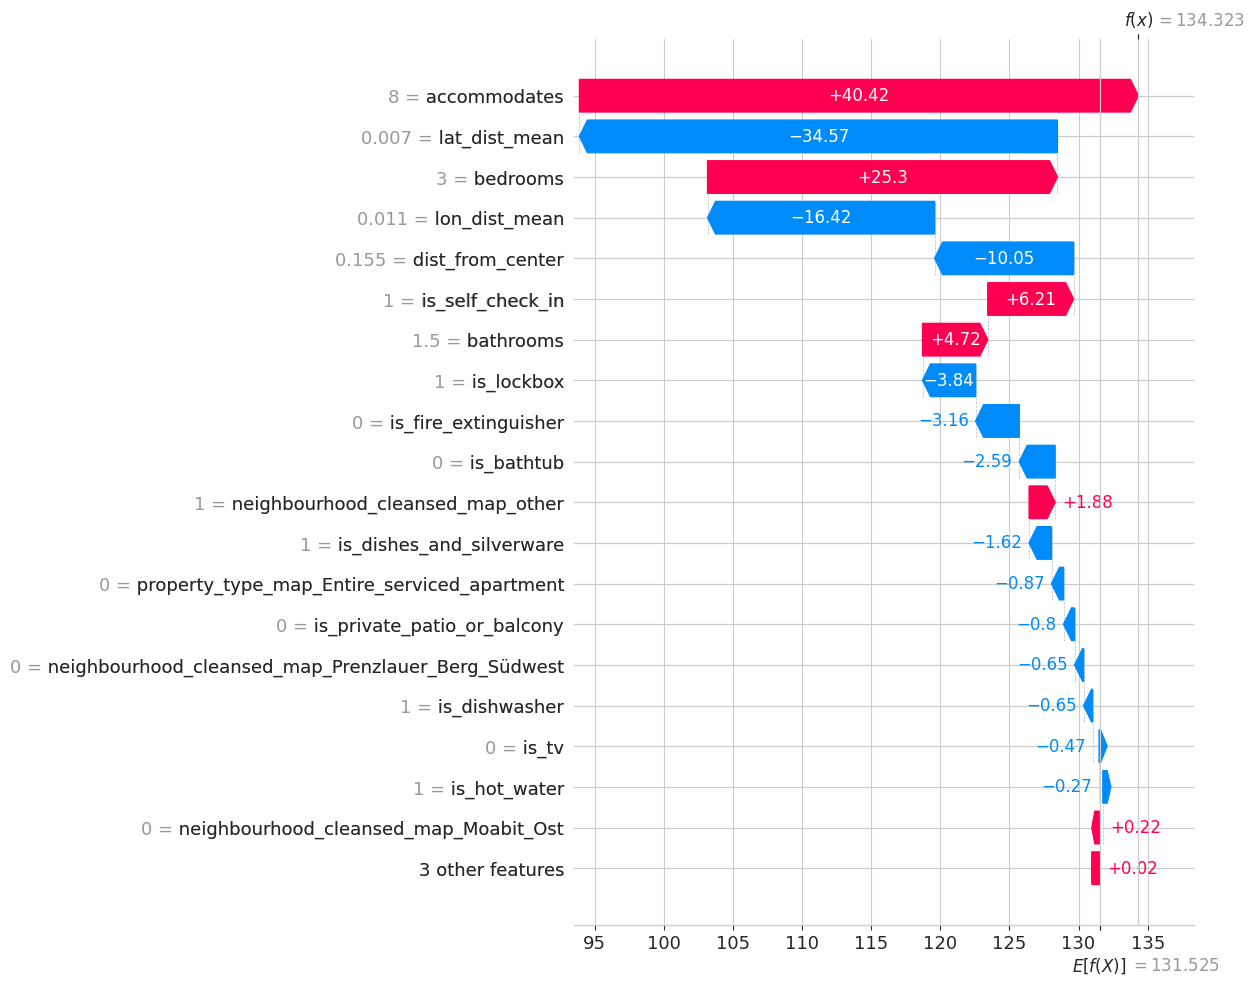

In [ ]:
# Oblicz predykcje dla najbardziej typowego przedstawiciela zbioru
predictions = model.predict(x)

# Znajdź przykład najbliższy średniej predykcji
mean_prediction = predictions.mean()
idx_typical = np.abs(predictions - mean_prediction).argmin()  # argmin zamiast idxmin

print(f"Najbardziej typowy przykład: indeks {idx_typical}")
print(f"Predykcja: {predictions[idx_typical]:.2f}, Średnia: {mean_prediction:.2f}")

# Wyświetl SHAP dla tego przykładu
shap.plots.waterfall(shap_values[idx_typical], max_display=20)

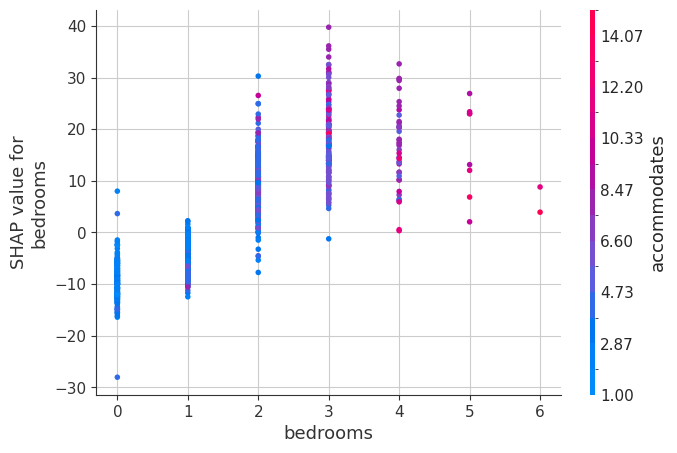

In [ ]:
# Wykres zależności dla wybranej zmiennej
variable_name = 'bedrooms'

shap.dependence_plot(
    variable_name,
    shap_values.values,
    x,
    interaction_index='auto'  # Automatycznie znajdzie najsilniejszą interakcję
)

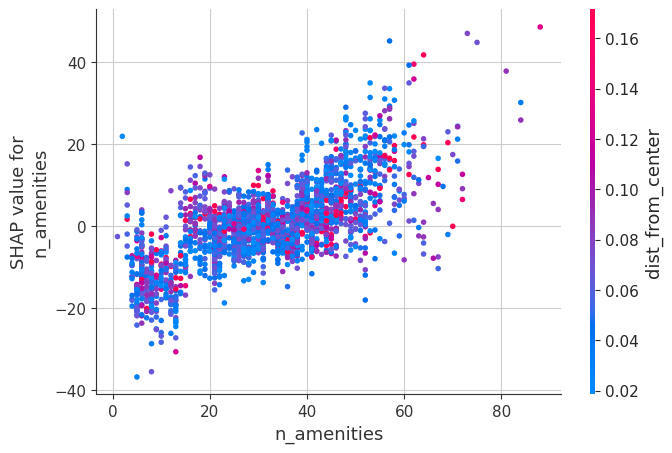

In [ ]:
# Wykres zależności dla wybranej zmiennej
variable_name = 'n_amenities'

shap.dependence_plot(
    variable_name,
    shap_values.values,
    x,
    interaction_index='auto'  # Automatycznie znajdzie najsilniejszą interakcję
)

### Single plot

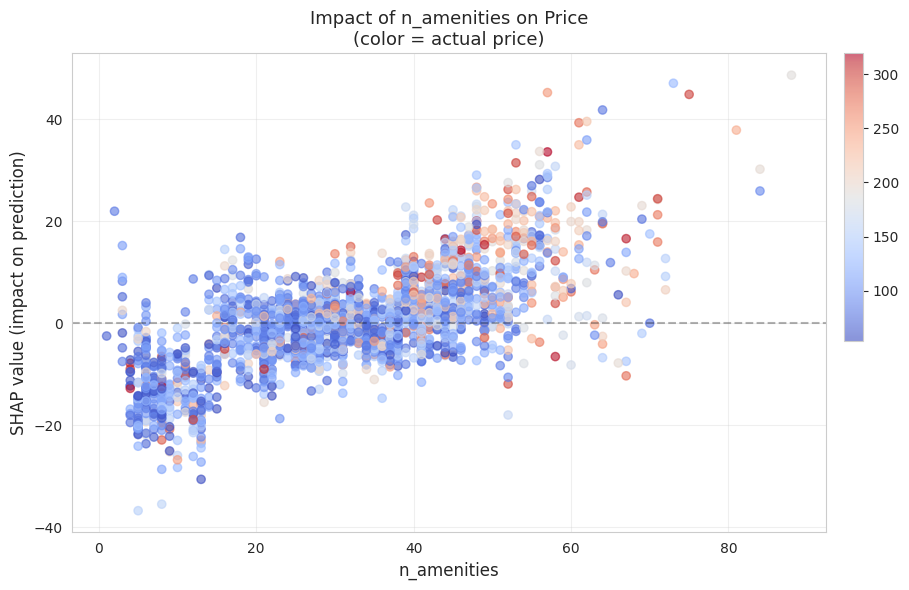

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))  # Dodaj rozmiar rysunku

variable_name = 'n_amenities'
variable_idx = list(x.columns).index(variable_name)

scatter = ax.scatter(  # Zmień axes na ax
    x[variable_name],
    shap_values.values[:, variable_idx],
    c=y,  # Kolor według rzeczywistej ceny
    cmap='coolwarm',
    alpha=0.6
)

# Colorbar - pionowy, zwężony, wyrównany do góry
cbar = fig.colorbar(
    scatter,
    orientation='vertical',
    pad=0.02,           # Odstęp od wykresu
    shrink=0.6,         # Wysokość: 60% wysokości wykresu
    aspect=15,          # Proporcje (wyższe = węższy)
    anchor=(0.0, 1.0)   # Wyrównanie do góry (1.0)
)
# cbar.ax.tick_params(labelsize=7)

# Zmień axes[i] na ax
ax.set_xlabel(variable_name, fontsize=12)
ax.set_ylabel('SHAP value (impact on prediction)', fontsize=12)
ax.set_title(f'Impact of {variable_name} on Price\n(color = actual price)', fontsize=13)
ax.axhline(y=0, color='black', linestyle='--', alpha=0.3)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

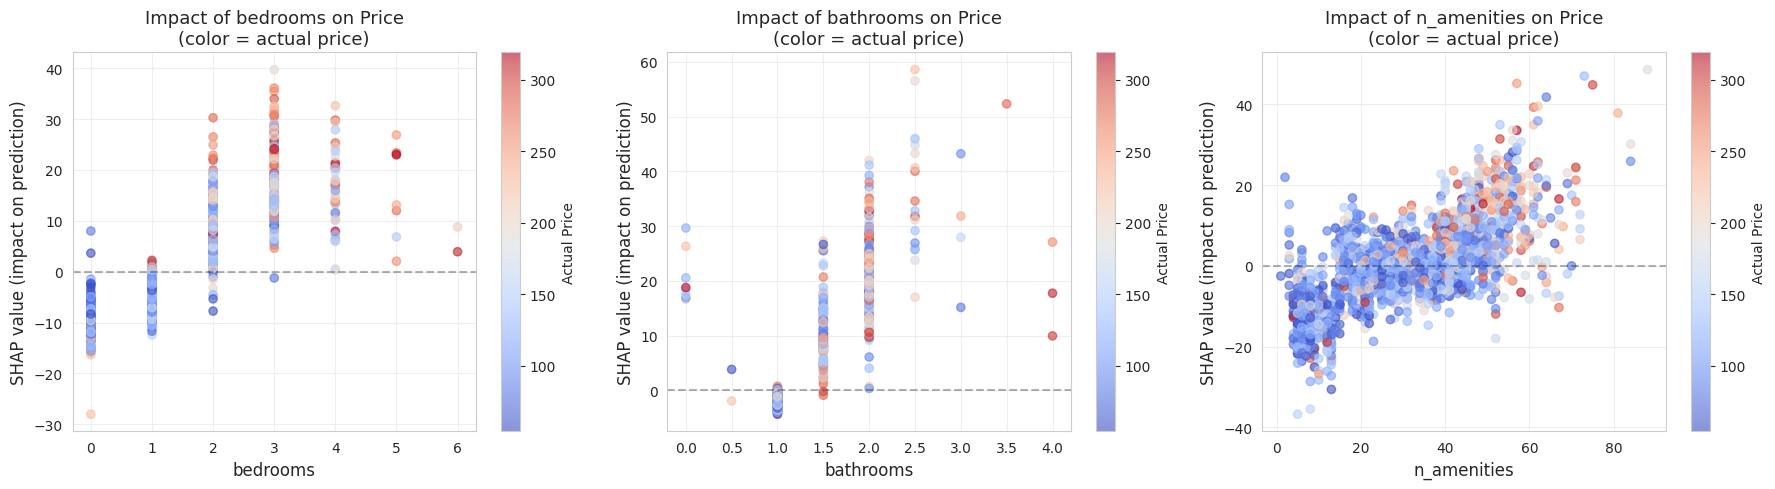

In [ ]:
import matplotlib.pyplot as plt

# Lista zmiennych do analizy
variables_to_plot = ['bedrooms', 'bathrooms', 'n_amenities']

# Stwórz subplot dla każdej zmiennej
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, variable_name in enumerate(variables_to_plot):
    variable_idx = list(x.columns).index(variable_name)

    # Wykres na konkretnym subplot
    scatter = axes[i].scatter(
        x[variable_name],
        shap_values.values[:, variable_idx],
        c=y,  # Kolor według rzeczywistej ceny
        cmap='coolwarm',
        alpha=0.6
    )

    # Colorbar dla każdego wykresu
    plt.colorbar(scatter, ax=axes[i], label='Actual Price')

    axes[i].set_xlabel(variable_name, fontsize=12)
    axes[i].set_ylabel('SHAP value (impact on prediction)', fontsize=12)
    axes[i].set_title(f'Impact of {variable_name} on Price\n(color = actual price)', fontsize=13)
    axes[i].axhline(y=0, color='black', linestyle='--', alpha=0.3)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

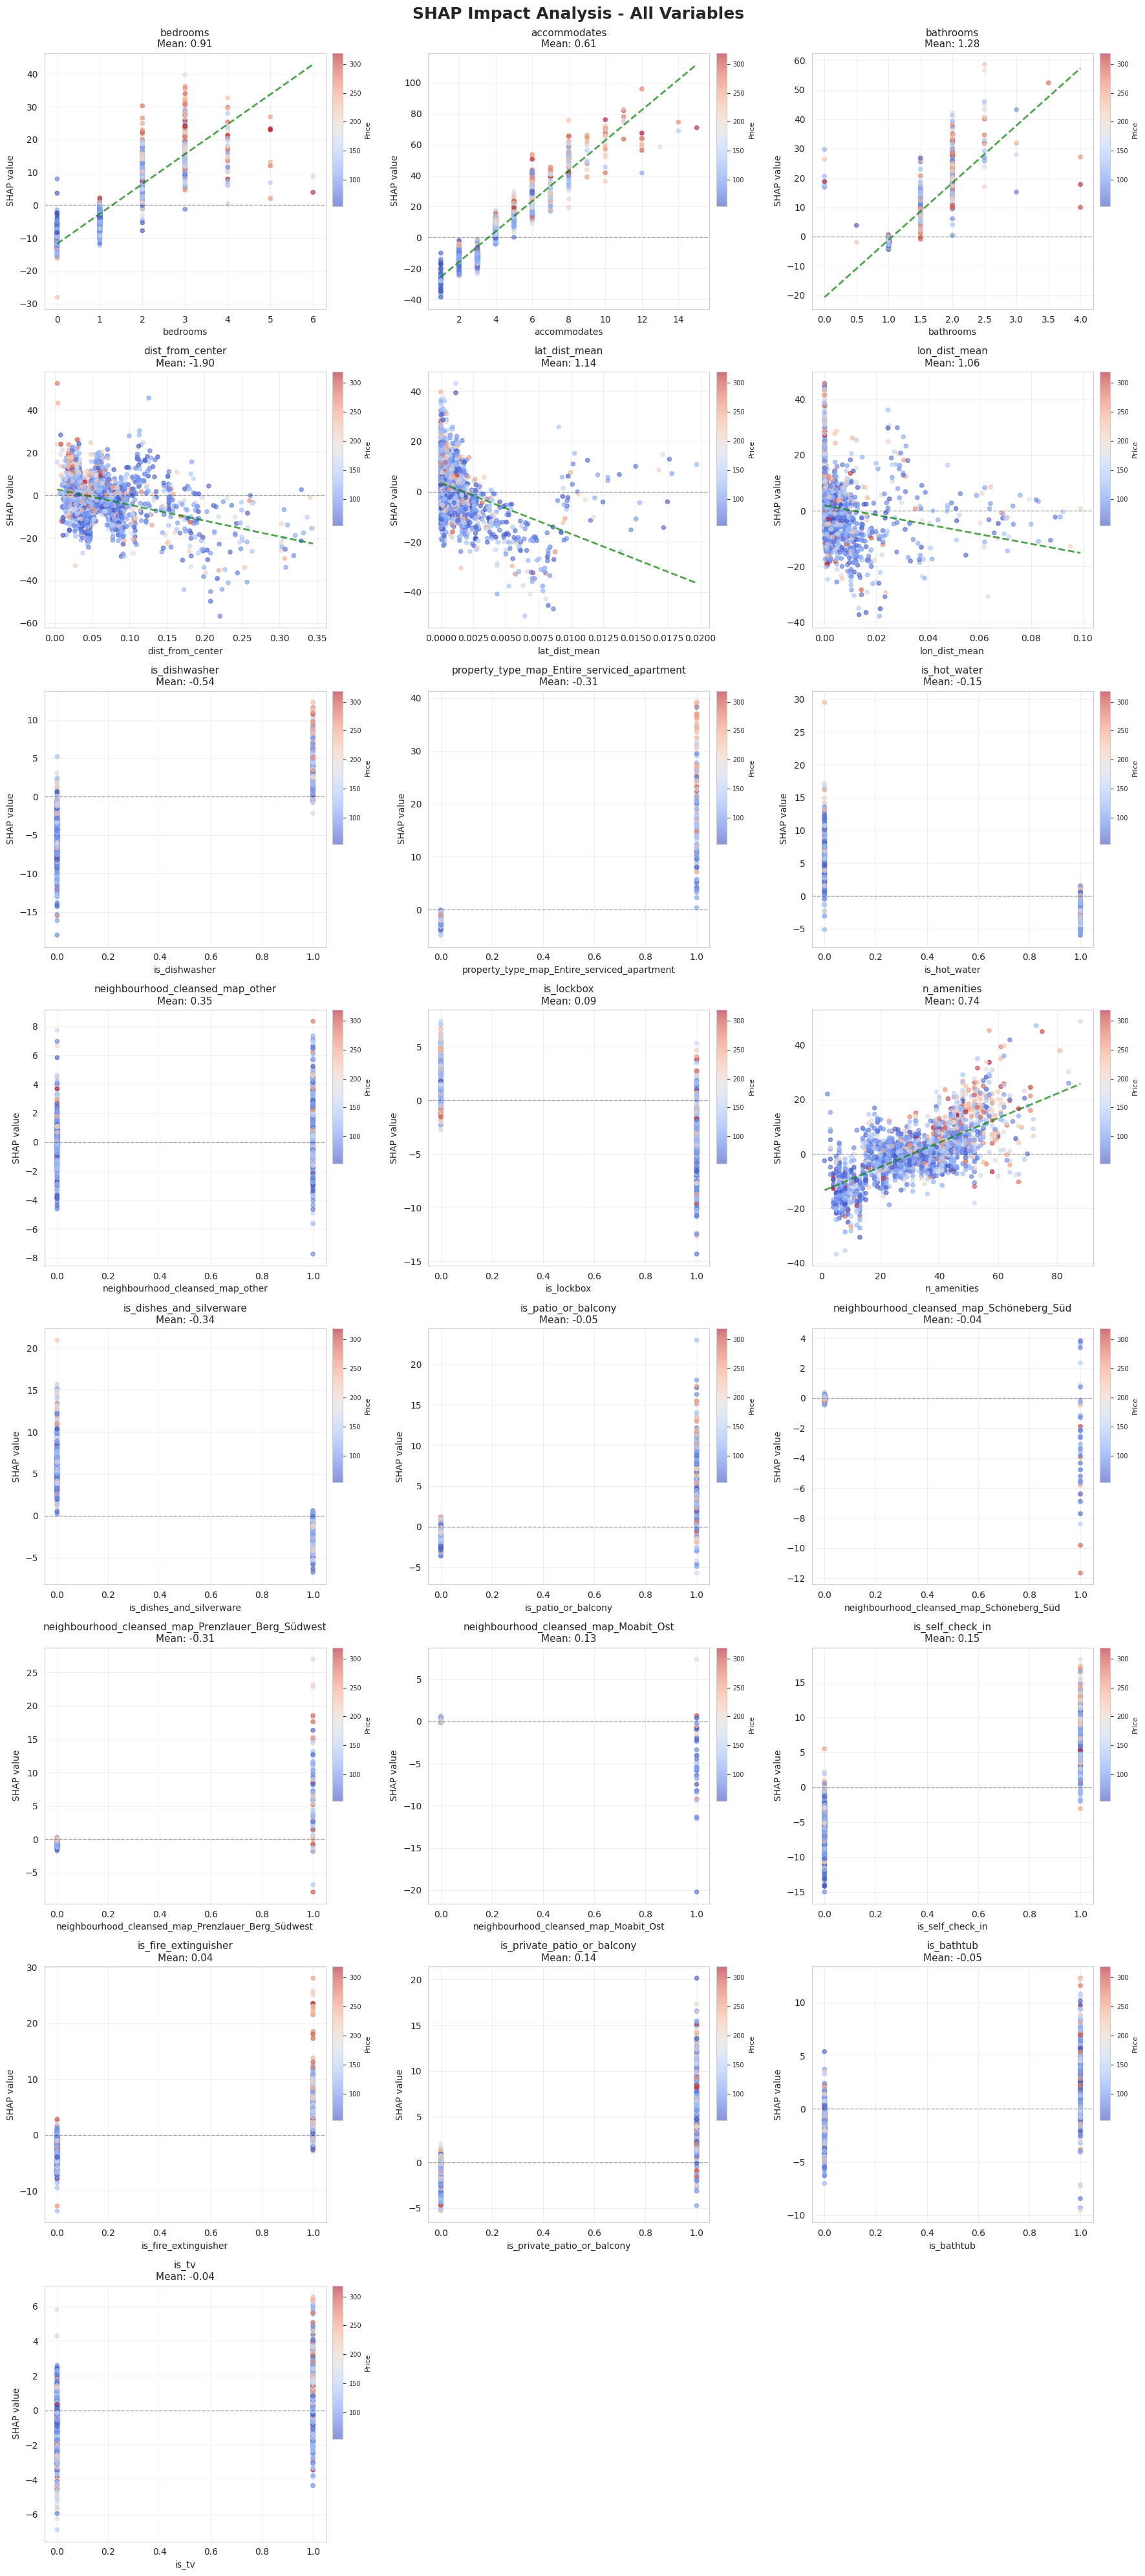

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

variables_to_plot = [
    'bedrooms',
    'accommodates',
    'bathrooms',
    'dist_from_center',
    'lat_dist_mean',
    'lon_dist_mean',
    'is_dishwasher',
    'property_type_map_Entire_serviced_apartment',
    'is_hot_water',
    'neighbourhood_cleansed_map_other',
    'is_lockbox',
    'n_amenities',
    'is_dishes_and_silverware',
    'is_patio_or_balcony',
    'neighbourhood_cleansed_map_Schöneberg_Süd',
    'neighbourhood_cleansed_map_Prenzlauer_Berg_Südwest',
    'neighbourhood_cleansed_map_Moabit_Ost',
    'is_self_check_in',
    'is_fire_extinguisher',
    'is_private_patio_or_balcony',
    'is_bathtub',
    'is_tv'
]

# 3 kolumny
n_cols = 3
n_rows = int(np.ceil(len(variables_to_plot) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, variable_name in enumerate(variables_to_plot):
    variable_idx = list(x.columns).index(variable_name)

    # Dane do wykresu
    x_data = x[variable_name]
    shap_data = shap_values.values[:, variable_idx]

    # Scatter plot
    scatter = axes[i].scatter(
        x_data,
        shap_data,
        c=y,
        cmap='coolwarm',
        alpha=0.6,
        s=20
    )

    # Colorbar - pionowy, zwężony, wyrównany do góry
    cbar = fig.colorbar(
        scatter,
        ax=axes[i],
        orientation='vertical',
        pad=0.02,           # Odstęp od wykresu
        shrink=0.6,         # Wysokość: 60% wysokości wykresu
        aspect=15,          # Proporcje (wyższe = węższy)
        anchor=(0.0, 1.0)   # Wyrównanie do góry (1.0)
    )
    cbar.set_label('Price', fontsize=8)
    cbar.ax.tick_params(labelsize=7)

    # Linia trendu
    if len(np.unique(x_data)) > 2:
        try:
            z = np.polyfit(x_data, shap_data, 1)
            p = np.poly1d(z)
            x_sorted = np.sort(x_data)
            axes[i].plot(x_sorted, p(x_sorted), "g--", linewidth=2, alpha=0.7)
        except:
            pass

    # Formatowanie
    axes[i].set_xlabel(variable_name, fontsize=10)
    axes[i].set_ylabel('SHAP value', fontsize=10)
    axes[i].set_title(f'{variable_name}\nMean: {shap_data.mean():.2f}', fontsize=11)
    axes[i].axhline(y=0, color='black', linestyle='--', alpha=0.3, linewidth=1)
    axes[i].grid(True, alpha=0.3)

# Usuń puste subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('SHAP Impact Analysis - All Variables', fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

!!! to zrobić, pokazać
1 łazienka wpływa pozytywnie o +0.63 na cenę pokoju.
Ocena 93 - zmniejsza cenę o -1.89
2 łóżka - zwiększa cenę o 2.69
Większa liczba recenzji - zwiększa cenę
Liczba gości - 1 gość tylko, to


Generalnie poniższy rysunek - przykład predykcji dla jednego przypadku
- bardzo fajne, żeby zrozumieć dany przypadek, dany model.

E[f(X)] - średnia dla całości, dla całego analizowanego zbioru danych.


Wykres sił.

In [ ]:
#Sources:
#https://www.kaggle.com/yaowenling/berlin-airbnb-data-exploration-public
#https://xavierbourretsicotte.github.io/lasso_implementation.html

### Multiplot ALL

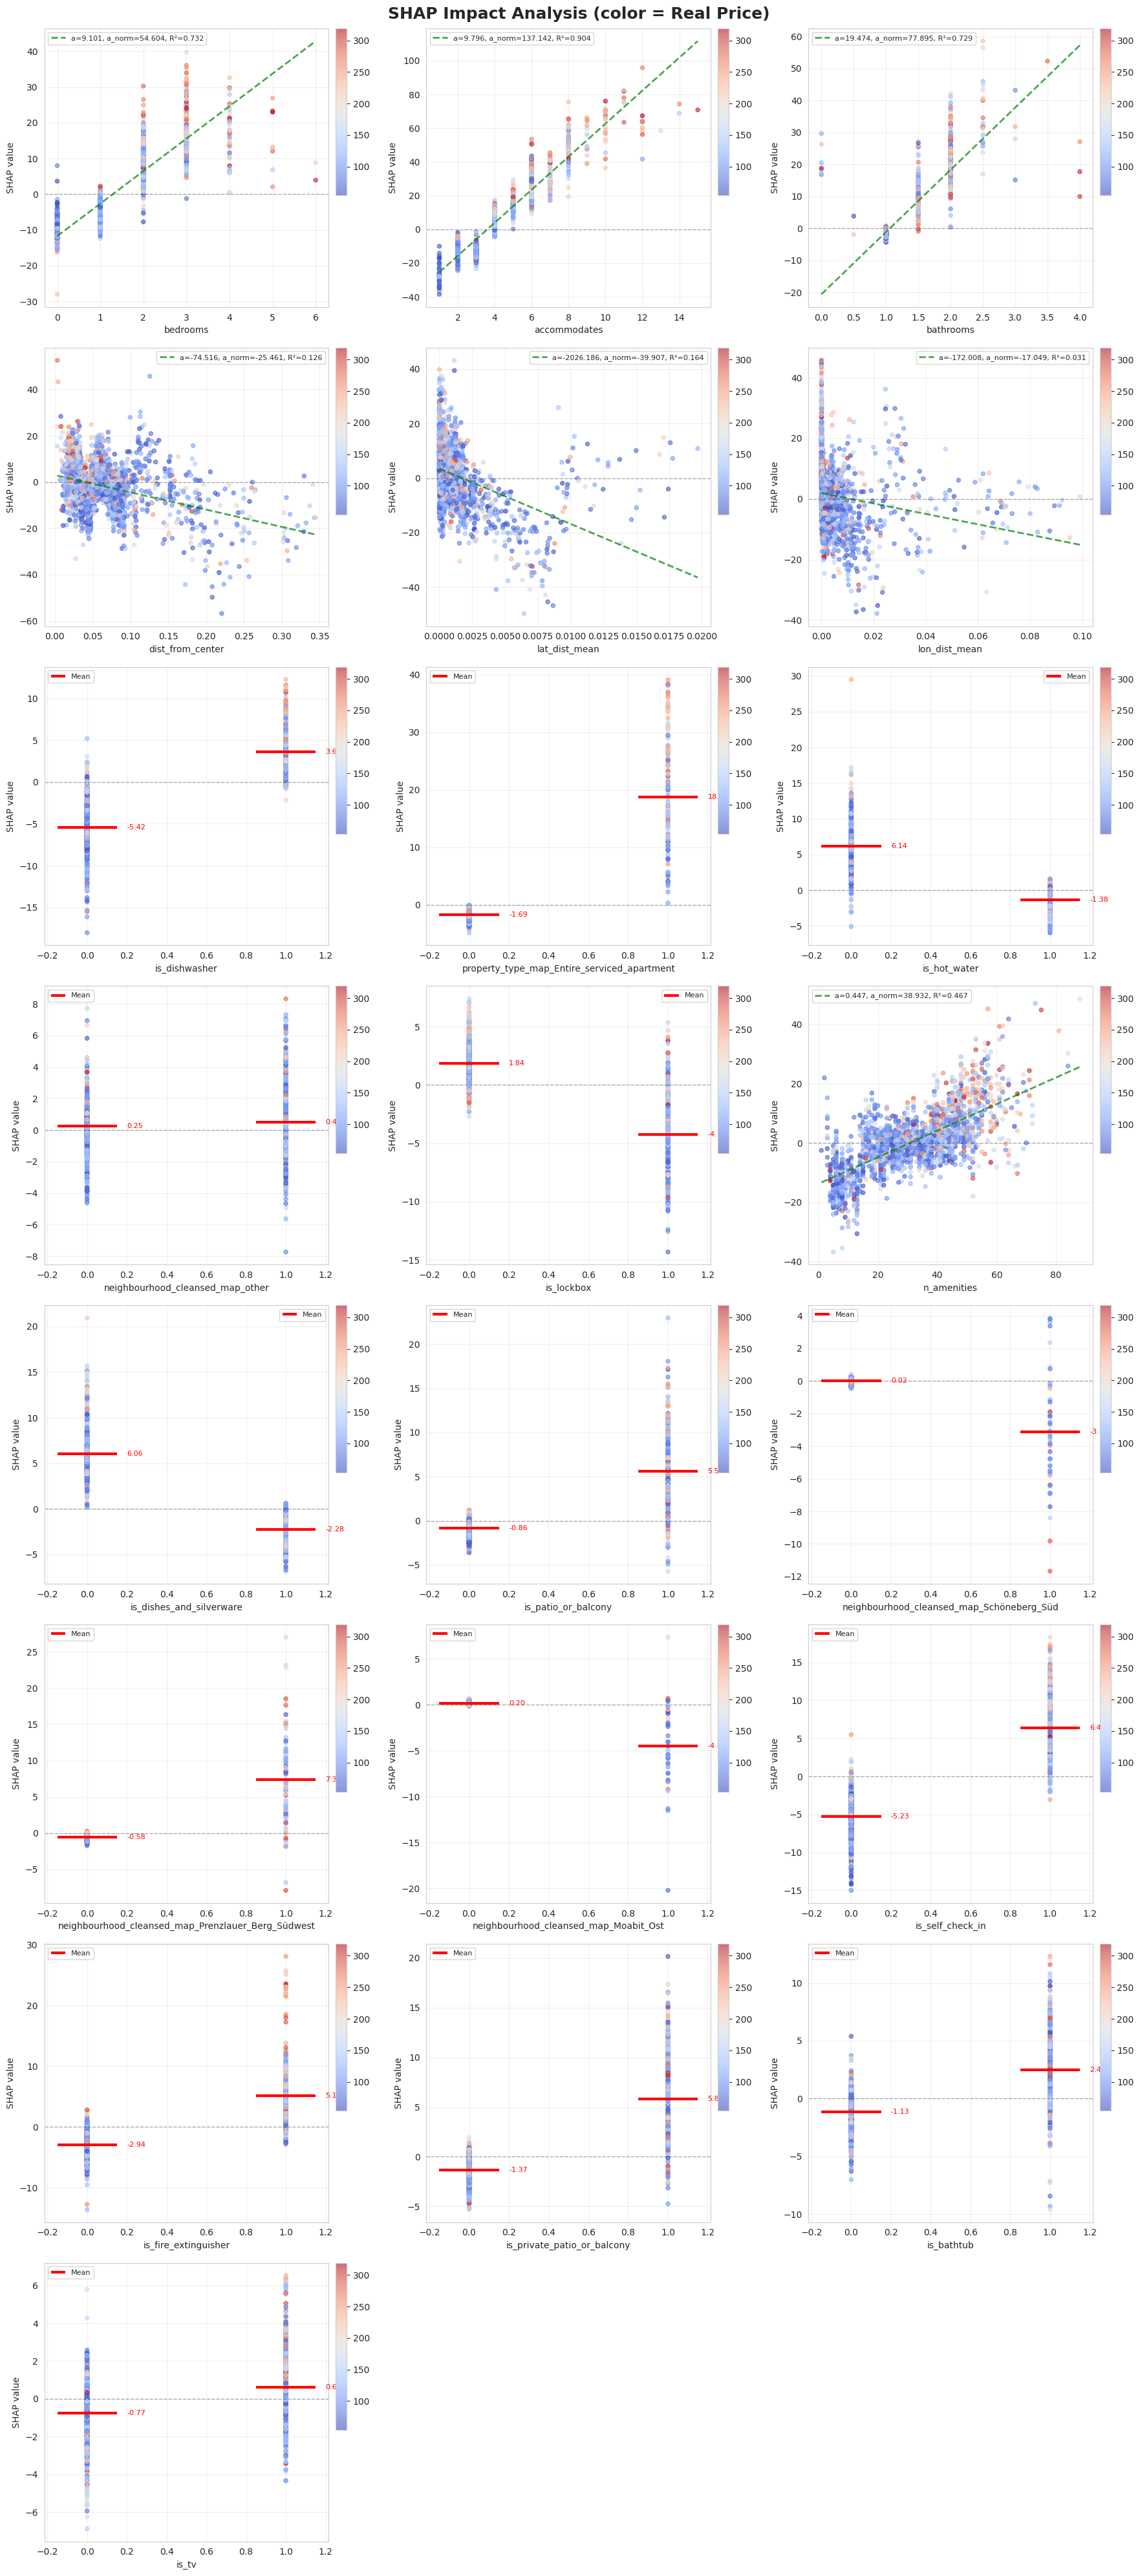


STATYSTYKI DLA ZMIENNYCH DYSKRETNYCH (≤4 wartości)

is_dishwasher:
  is_dishwasher=0: SHAP=   -5.42 (n=1072)
  is_dishwasher=1: SHAP=    3.61 (n=1260)
  Różnica (1 vs 0):     9.03

property_type_map_Entire_serviced_apartment:
  property_type_map_Entire_serviced_apartment=0: SHAP=   -1.69 (n=2175)
  property_type_map_Entire_serviced_apartment=1: SHAP=   18.80 (n=157)
  Różnica (1 vs 0):    20.50

is_hot_water:
  is_hot_water=0: SHAP=    6.14 (n=381)
  is_hot_water=1: SHAP=   -1.38 (n=1951)
  Różnica (1 vs 0):    -7.52

neighbourhood_cleansed_map_other:
  neighbourhood_cleansed_map_other=0: SHAP=    0.25 (n=1336)
  neighbourhood_cleansed_map_other=1: SHAP=    0.49 (n=996)
  Różnica (1 vs 0):     0.24

is_lockbox:
  is_lockbox=0: SHAP=    1.84 (n=1661)
  is_lockbox=1: SHAP=   -4.25 (n=671)
  Różnica (1 vs 0):    -6.09

is_dishes_and_silverware:
  is_dishes_and_silverware=0: SHAP=    6.06 (n=543)
  is_dishes_and_silverware=1: SHAP=   -2.28 (n=1789)
  Różnica (1 vs 0):    -8.34

is_patio_o

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

variables_to_plot = variables_used
n_unique_limit = 4

# 3 kolumny
n_cols = 3
n_rows = int(np.ceil(len(variables_to_plot) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, variable_name in enumerate(variables_to_plot):
    variable_idx = list(x.columns).index(variable_name)

    # Dane do wykresu
    x_data = x[variable_name]
    shap_data = shap_values.values[:, variable_idx]

    # Scatter plot
    scatter = axes[i].scatter(
        x_data,
        shap_data,
        c=y,
        cmap='coolwarm',
        alpha=0.6,
        s=20
    )

    # Colorbar
    cbar = fig.colorbar(
        scatter,
        ax=axes[i],
        orientation='vertical',
        pad=0.02,
        shrink=0.6,
        aspect=15,
        anchor=(0.0, 1.0)
    )

    # Sprawdź czy zmienna dyskretna (mało unikalnych wartości)
    unique_vals = np.unique(x_data)
    n_unique = len(unique_vals)

    if n_unique <= n_unique_limit:  # Zmienna dyskretna
        # Oblicz średnie SHAP dla każdej wartości
        for val in unique_vals:
            mask = x_data == val
            mean_shap = shap_data[mask].mean()

            # Pozioma linia pokazująca średnią
            axes[i].hlines(
                mean_shap,
                val - 0.15,
                val + 0.15,
                colors='red',
                linewidth=3,
                zorder=5,
                label='Mean' if val == unique_vals[0] else ''
            )

            # Tekst ze średnią
            axes[i].text(
                val + 0.2,
                mean_shap,
                f'{mean_shap:.2f}',
                fontsize=8,
                color='red',
                va='center'
            )
    else:  # Zmienna ciągła - linia trendu
        # try:
          # Regresja liniowa
          slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, shap_data)

          # Linia trendu
          x_sorted = np.sort(x_data)
          y_trend = slope * x_sorted + intercept

          # Znormalizowane nachylenie
          x_range = x_data.max() - x_data.min()
          slope_normalized = slope * x_range

          axes[i].plot(
              x_sorted,
              y_trend,
              "g--",
              linewidth=2,
              alpha=0.7,
              label=f'a={slope:.3f}, a_norm={slope_normalized:.3f}, R²={r_value**2:.3f}'
          )

    #         # Dodaj nachylenie i R² do tytułu
    #         axes[i].set_title(
    #             f'{variable_name}\nMean: {shap_data.mean():.2f}, a={slope:.3f}',
    #             fontsize=11
    #         )
    #     except:
    #         axes[i].set_title(f'{variable_name}\nMean: {shap_data.mean():.2f}', fontsize=11)

    # # Formatowanie (jeśli zmienna dyskretna, tytuł bez nachylenia)
    # if n_unique <= n_unique_limit:
    #     axes[i].set_title(f'{variable_name}\nMean: {shap_data.mean():.2f}', fontsize=11)

    axes[i].set_xlabel(variable_name, fontsize=10)
    axes[i].set_ylabel('SHAP value', fontsize=10)
    axes[i].axhline(y=0, color='black', linestyle='--', alpha=0.3, linewidth=1)
    axes[i].grid(True, alpha=0.3)

    # Legenda
    if n_unique <= n_unique_limit or n_unique > n_unique_limit:
        axes[i].legend(loc='best', fontsize=8)

# Usuń puste subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('SHAP Impact Analysis (color = Real Price)', fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Statystyki dla zmiennych dyskretnych
print("\n" + "="*80)
print(f"STATYSTYKI DLA ZMIENNYCH DYSKRETNYCH (≤{n_unique_limit} wartości)")
print("="*80)

for variable_name in variables_to_plot:
    variable_idx = list(x.columns).index(variable_name)
    x_data = x[variable_name]
    shap_data = shap_values.values[:, variable_idx]
    unique_vals = np.unique(x_data)

    if len(unique_vals) <= n_unique_limit:  # Dyskretna zmienna
        print(f"\n{variable_name}:")
        for val in unique_vals:
            mask = x_data == val
            mean_shap = shap_data[mask].mean()
            count = mask.sum()
            print(f"  {variable_name}={val}: SHAP={mean_shap:>8.2f} (n={count})")

        # Różnica między wartościami (dla binarnych)
        if len(unique_vals) == 2:
            diff = shap_data[x_data == unique_vals[1]].mean() - shap_data[x_data == unique_vals[0]].mean()
            print(f"  Różnica ({unique_vals[1]} vs {unique_vals[0]}): {diff:>8.2f}")

# Statystyki dla zmiennych ciągłych
print("\n" + "="*80)
print(f"STATYSTYKI DLA ZMIENNYCH CIĄGŁYCH (>{n_unique_limit} wartości)")
print("="*80)

for variable_name in variables_to_plot:
    variable_idx = list(x.columns).index(variable_name)
    x_data = x[variable_name]
    shap_data = shap_values.values[:, variable_idx]
    unique_vals = np.unique(x_data)

    if len(unique_vals) > n_unique_limit:  # Ciągła zmienna
        try:
            slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, shap_data)

            # Dodatkowe statystyki
            x_min = x_data.min()
            x_max = x_data.max()
            x_range = x_max - x_min

            # Znormalizowane nachylenie (wpływ przejścia przez cały zakres)
            slope_normalized = slope * x_range

            print(f"\n{variable_name}:")
            print(f"  Nachylenie (a):              {slope:>10.4f}")
            print(f"  Przecięcie (b):              {intercept:>10.4f}")
            print(f"  R²:                          {r_value**2:>10.4f}")
            print(f"  Znormalizowane (a×range):    {slope_normalized:>10.4f}")
            print(f"  p-value:                     {p_value:>10.4e}")
            print(f"  Std error:                   {std_err:>10.4f}")
            print(f"  Feature min:                 {x_min:>10.4f}")
            print(f"  Feature max:                 {x_max:>10.4f}")
            print(f"  Feature range:               {x_range:>10.4f}")
            print(f"  Interpretacja:")
            print(f"    - 1 jednostka wzrostu → {slope:.4f} zmiana SHAP")
            print(f"    - Przejście min→max → {slope_normalized:.4f} zmiana SHAP")
            print(f"  ---------------------------------------")
        except:
            print(f"\n{variable_name}: Błąd w obliczeniu regresji")

### Multiplot ALL - Reversed

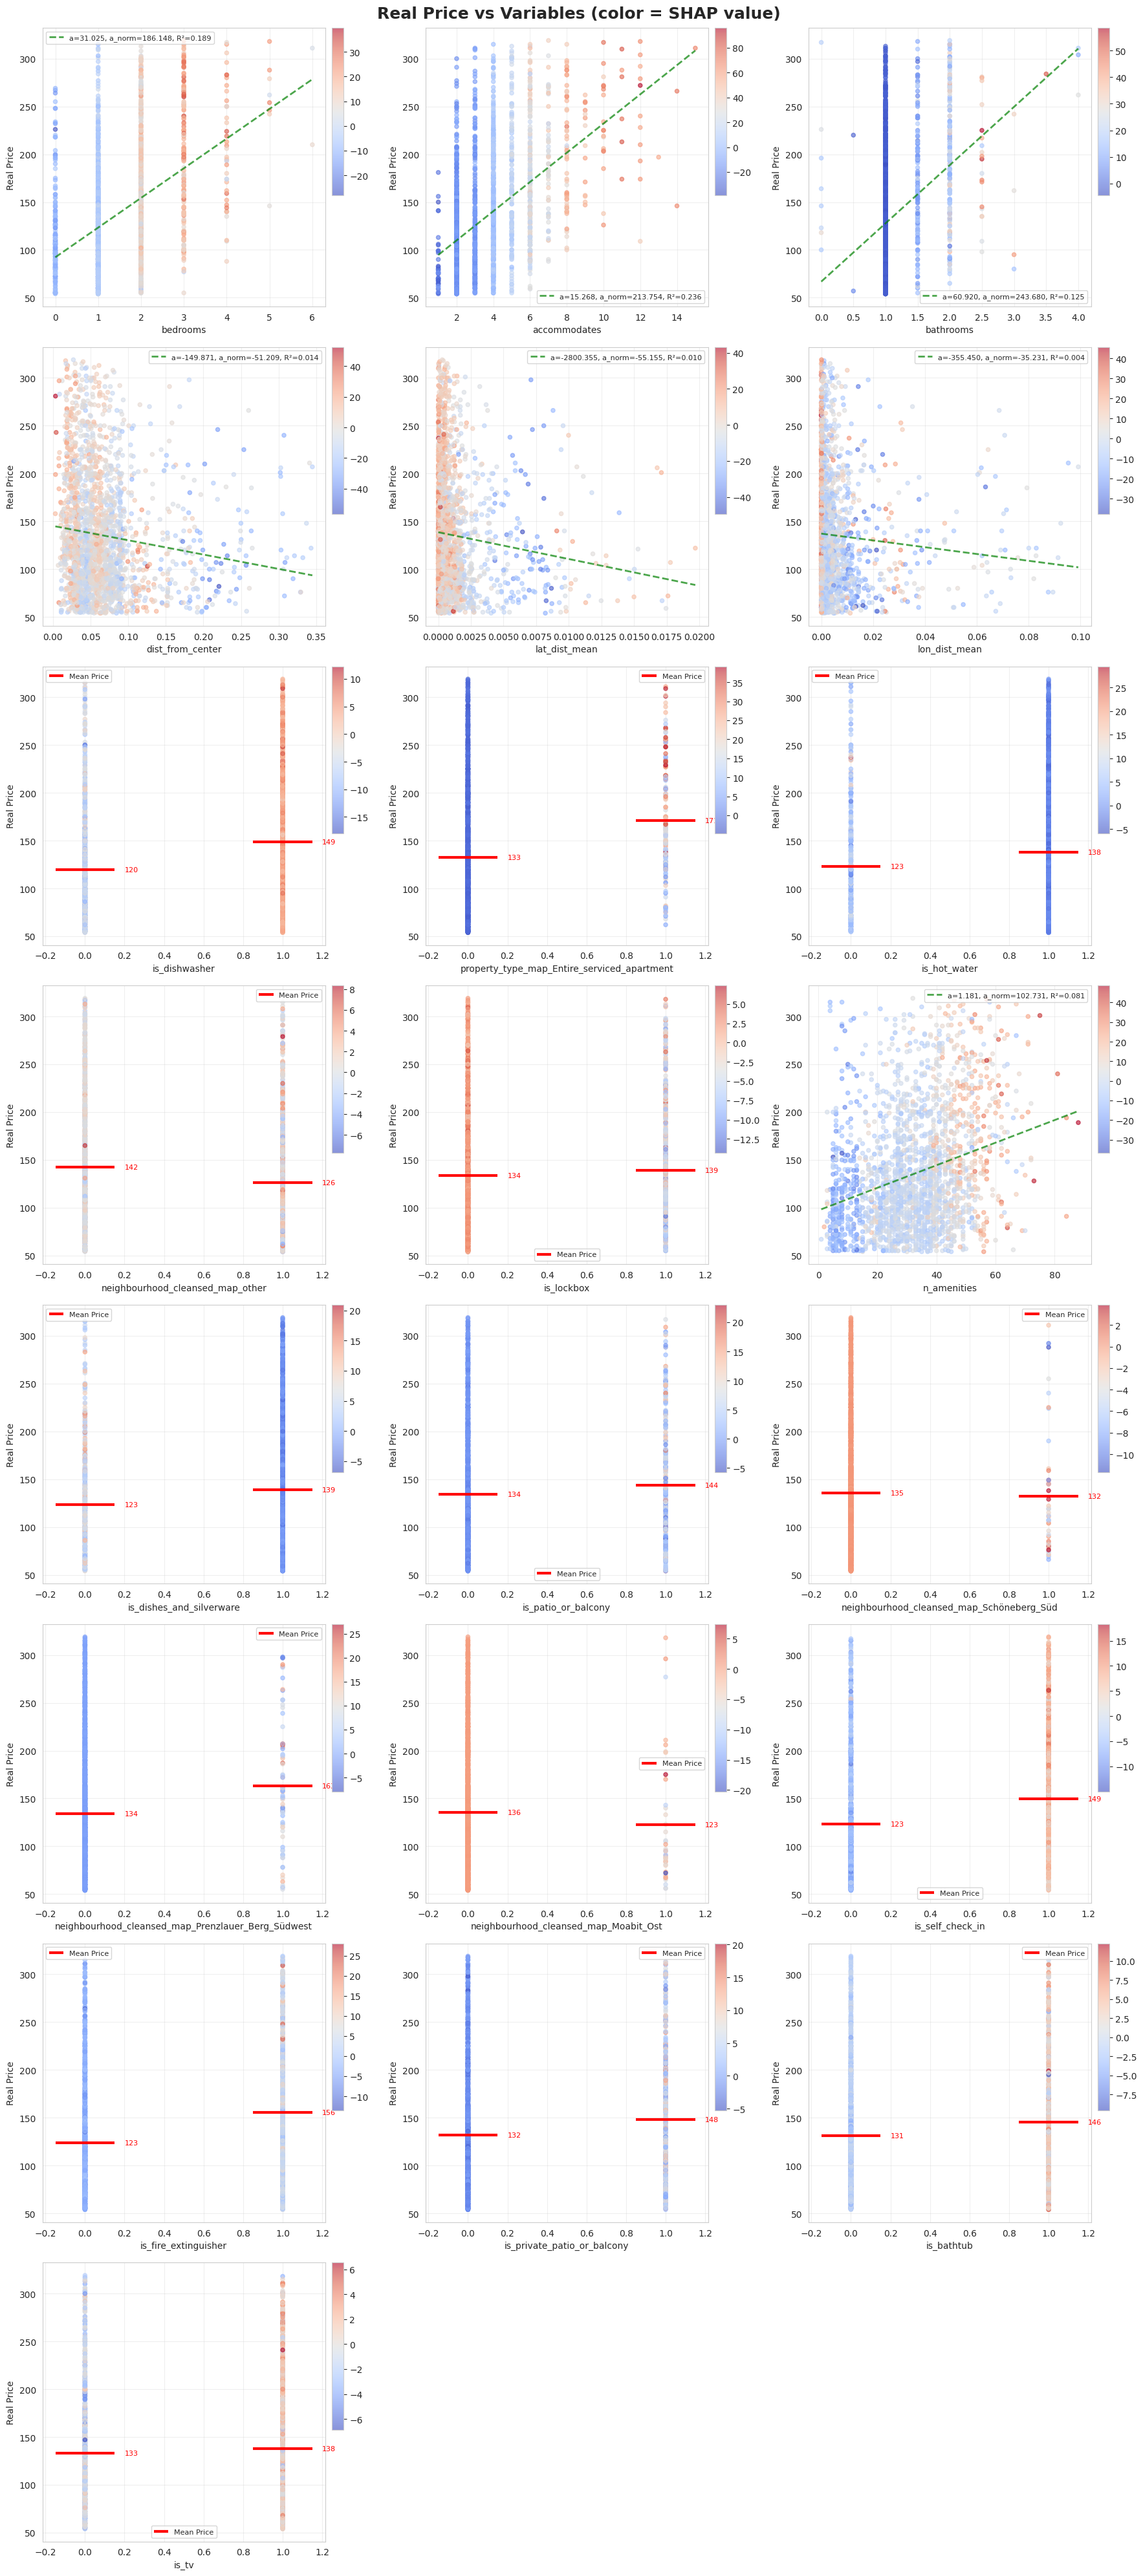


STATYSTYKI DLA ZMIENNYCH DYSKRETNYCH - REAL PRICE

is_dishwasher:
  is_dishwasher=0: Mean Price=     120 (n=1072)
  is_dishwasher=1: Mean Price=     149 (n=1260)
  Różnica cen (1 vs 0):       29

property_type_map_Entire_serviced_apartment:
  property_type_map_Entire_serviced_apartment=0: Mean Price=     133 (n=2175)
  property_type_map_Entire_serviced_apartment=1: Mean Price=     171 (n=157)
  Różnica cen (1 vs 0):       38

is_hot_water:
  is_hot_water=0: Mean Price=     123 (n=381)
  is_hot_water=1: Mean Price=     138 (n=1951)
  Różnica cen (1 vs 0):       15

neighbourhood_cleansed_map_other:
  neighbourhood_cleansed_map_other=0: Mean Price=     142 (n=1336)
  neighbourhood_cleansed_map_other=1: Mean Price=     126 (n=996)
  Różnica cen (1 vs 0):      -16

is_lockbox:
  is_lockbox=0: Mean Price=     134 (n=1661)
  is_lockbox=1: Mean Price=     139 (n=671)
  Różnica cen (1 vs 0):        5

is_dishes_and_silverware:
  is_dishes_and_silverware=0: Mean Price=     123 (n=543)
  is_dis

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

variables_to_plot = variables_used
n_unique_limit = 4

# 3 kolumny
n_cols = 3
n_rows = int(np.ceil(len(variables_to_plot) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, variable_name in enumerate(variables_to_plot):
    variable_idx = list(x.columns).index(variable_name)

    # Dane do wykresu
    x_data = x[variable_name]
    shap_data = shap_values.values[:, variable_idx]
    y_data = y  # Real price

    # Scatter plot - ODWRÓCONY: oś Y = Real Price, kolor = SHAP
    scatter = axes[i].scatter(
        x_data,           # x: zmienna
        y_data,           # y: Real Price (było: shap_data)
        c=shap_data,      # kolor: SHAP value (było: y)
        cmap='coolwarm',
        alpha=0.6,
        s=20
    )

    # Colorbar
    cbar = fig.colorbar(
        scatter,
        ax=axes[i],
        orientation='vertical',
        pad=0.02,
        shrink=0.6,
        aspect=15,
        anchor=(0.0, 1.0)
    )
    # cbar.set_label('SHAP value', fontsize=8)
    # cbar.ax.tick_params(labelsize=7)

    # Sprawdź czy zmienna dyskretna (mało unikalnych wartości)
    unique_vals = np.unique(x_data)
    n_unique = len(unique_vals)

    if n_unique <= n_unique_limit:  # Zmienna dyskretna
        # Oblicz średnie Real Price dla każdej wartości
        for val in unique_vals:
            mask = x_data == val
            mean_price = y_data[mask].mean()

            # Pozioma linia pokazująca średnią cenę
            axes[i].hlines(
                mean_price,
                val - 0.15,
                val + 0.15,
                colors='red',
                linewidth=3,
                zorder=5,
                label='Mean Price' if val == unique_vals[0] else ''
            )

            # Tekst ze średnią
            axes[i].text(
                val + 0.2,
                mean_price,
                f'{mean_price:.0f}',
                fontsize=8,
                color='red',
                va='center'
            )
    else:  # Zmienna ciągła - linia trendu
        # try:
          # Regresja liniowa: Real Price vs zmienna
          slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)

          # Linia trendu
          x_sorted = np.sort(x_data)
          y_trend = slope * x_sorted + intercept

          # Znormalizowane nachylenie
          x_range = x_data.max() - x_data.min()
          slope_normalized = slope * x_range

          axes[i].plot(
              x_sorted,
              y_trend,
              "g--",
              linewidth=2,
              alpha=0.7,
              label=f'a={slope:.3f}, a_norm={slope_normalized:.3f}, R²={r_value**2:.3f}'
          )

          # # Dodaj nachylenie i R² do tytułu
          # axes[i].set_title(
          #     f'f'a={slope:.3f}, a_norm={slope_normalized:.3f}, R²={r_value**2:.3f}',
          #     fontsize=11
          # )
        # except:
        #     axes[i].set_title(f'{variable_name}\nMean Price: {y_data.mean():.0f}', fontsize=11)

    # # Formatowanie (jeśli zmienna dyskretna, tytuł bez nachylenia)
    # if n_unique <= n_unique_limit:
    #     axes[i].set_title(f'{variable_name}\nMean Price: {y_data.mean():.0f}', fontsize=11)

    axes[i].set_xlabel(variable_name, fontsize=10)
    axes[i].set_ylabel('Real Price', fontsize=10)  # ZMIENIONE
    axes[i].grid(True, alpha=0.3)

    # Legenda
    if n_unique <= n_unique_limit or n_unique > n_unique_limit:
        axes[i].legend(loc='best', fontsize=8)

# Usuń puste subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Real Price vs Variables (color = SHAP value)', fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Statystyki dla zmiennych dyskretnych
print("\n" + "="*80)
print("STATYSTYKI DLA ZMIENNYCH DYSKRETNYCH - REAL PRICE")
print("="*80)

for variable_name in variables_to_plot:
    variable_idx = list(x.columns).index(variable_name)
    x_data = x[variable_name]
    y_data = y
    unique_vals = np.unique(x_data)

    if len(unique_vals) <= n_unique_limit:
        print(f"\n{variable_name}:")
        for val in unique_vals:
            mask = x_data == val
            mean_price = y_data[mask].mean()
            count = mask.sum()
            print(f"  {variable_name}={val}: Mean Price={mean_price:>8.0f} (n={count})")

        # Różnica w cenach
        if len(unique_vals) == 2:
            diff = y_data[x_data == unique_vals[1]].mean() - y_data[x_data == unique_vals[0]].mean()
            print(f"  Różnica cen ({unique_vals[1]} vs {unique_vals[0]}): {diff:>8.0f}")

# Statystyki dla zmiennych ciągłych
print("\n" + "="*80)
print("STATYSTYKI DLA ZMIENNYCH CIĄGŁYCH - REAL PRICE vs VARIABLE")
print("="*80)

for variable_name in variables_to_plot:
    variable_idx = list(x.columns).index(variable_name)
    x_data = x[variable_name]
    y_data = y
    unique_vals = np.unique(x_data)

    if len(unique_vals) > n_unique_limit:  # Ciągła zmienna
        try:
            slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)

            # Dodatkowe statystyki
            x_min = x_data.min()
            x_max = x_data.max()
            x_range = x_max - x_min

            # Znormalizowane nachylenie (wpływ przejścia przez cały zakres)
            slope_normalized = slope * x_range

            print(f"\n{variable_name}:")
            print(f"  Nachylenie (a):              {slope:>10.4f}")
            print(f"  Przecięcie (b):              {intercept:>10.4f}")
            print(f"  R²:                          {r_value**2:>10.4f}")
            print(f"  Znormalizowane (a×range):    {slope_normalized:>10.4f}")
            print(f"  p-value:                     {p_value:>10.4e}")
            print(f"  Std error:                   {std_err:>10.4f}")
            print(f"  Feature min:                 {x_min:>10.4f}")
            print(f"  Feature max:                 {x_max:>10.4f}")
            print(f"  Feature range:               {x_range:>10.4f}")
            print(f"  Interpretacja:")
            print(f"    - 1 jednostka wzrostu → {slope:.4f} EUR zmiana ceny")
            print(f"    - Przejście min→max → {slope_normalized:.4f} EUR zmiana ceny")
            print(f"  ---------------------------------------")
        except:
            print(f"\n{variable_name}: Błąd w obliczeniu regresji")